# Aula 01: Sua primeira Análise de Dados da Educação

Nesta Imersão Dados, será usada uma parte dos micro dados do ENEM de 2019 junto com seu dicionário. Esse sample foi retirado dos micro dados completos que estavam disponíveis no site do Inep.

## 1. Aula

Para essa semana, usaremos a biblioteca Pandas para fazer a análise de dados e as bibliotecas seaborn e matplotlib para a criação de gráficos e visualização de dados.

In [53]:
import pandas as pd

fonte = "https://github.com/vinicius-pf/Imersao-Dados-2/blob/main/dados/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"

dados = pd.read_csv(fonte)
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,...,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,...,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,...,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,...,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,...,A,A,A,B,A,A,D,A,A,B


In [54]:
print(f'A base de dados contém informações de {dados.shape[0]} estudantes e {dados.shape[1]} colunas')

A base de dados contém informações de 127380 estudantes e 136 colunas


A amostra possue dados de 127 mil estudantes, sendo que o total de inscritos foi de cerca de 50 milhões. Caso fosse usada a base de dados completa, o sistema de análise teria que ser alterado, pois a versão gratuita do Google Colab não seria suficiente.

A amostra foi retirada aleatóriamente, utilizando um script pyhton. Esse script está disponível [aqui](https://github.com/alura-cursos/imersao-dados-2-2020/tree/master/filtrarDados).

Primeiro, vamos analisar uma coluna única.

In [55]:
dados['SG_UF_RESIDENCIA']

0         PA
1         PA
2         PA
3         PA
4         PA
          ..
127375    MG
127376    BA
127377    BA
127378    BA
127379    MG
Name: SG_UF_RESIDENCIA, Length: 127380, dtype: object

Desse jeito, conseguimos saber o que essa coluna significa. Neste caso, a coluna traz a sigla do Estado para cada inscrito. 

Como desejamos saber o que cada coluna significa, utilizar a mesma estratégia para cada coluna tomaria muito tempo. Para isso, temos disponível um dicionário que explica o que cada coluna significa.

In [56]:
dados.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE',
       'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
       'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24

Assim conseguimos ver todas as colunas. Com os nomes das colunas, podemos encontrar no dicionário o que as colunas significam e quais os valores esperados para cada coluna.

In [57]:
dados['SG_UF_RESIDENCIA']

0         PA
1         PA
2         PA
3         PA
4         PA
          ..
127375    MG
127376    BA
127377    BA
127378    BA
127379    MG
Name: SG_UF_RESIDENCIA, Length: 127380, dtype: object

Para verificar quais estados estão presentes, usamos o .unique()

In [58]:
dados['SG_UF_RESIDENCIA'].unique()

array(['PA', 'RO', 'MT', 'AC', 'AM', 'RR', 'MA', 'PR', 'BA', 'PI', 'CE',
       'PE', 'AP', 'TO', 'SC', 'GO', 'MG', 'SP', 'SE', 'RJ', 'PB', 'AL',
       'RN', 'ES', 'DF', 'RS', 'MS'], dtype=object)

In [59]:
num_estados = len(dados['SG_UF_RESIDENCIA'].unique())


print(f'Temos alunos de {num_estados} estados neste dataset')

Temos alunos de 27 estados neste dataset


Para ver a contagem de alunos em cada estado podemos usar o value_counts()

In [60]:
dados['SG_UF_RESIDENCIA'].value_counts()

SP    20264
MG    13547
BA    10040
RJ     8467
CE     7381
PA     7170
PE     6941
MA     5543
RS     5466
PR     5259
GO     4268
PB     3690
PI     3034
RN     2959
AM     2820
SC     2673
ES     2550
DF     2408
AL     2263
MT     2230
SE     1815
MS     1655
RO     1400
TO     1178
AP     1047
AC      946
RR      366
Name: SG_UF_RESIDENCIA, dtype: int64

Também podemos saber a quantidade de participantes por idade.

In [61]:
dados['NU_IDADE'].value_counts()

18    21452
17    21256
19    14418
20    10413
16     7830
      ...  
73        2
75        2
77        1
82        1
76        1
Name: NU_IDADE, Length: 65, dtype: int64

In [62]:
dados['NU_IDADE'].value_counts().sort_index()

13        4
14      141
15     2009
16     7830
17    21256
      ...  
73        2
75        2
76        1
77        1
82        1
Name: NU_IDADE, Length: 65, dtype: int64

Apesar de termos os valores, a análise ainda fica estranha. A resposta, apesar de completa, mostra apenas alguns valores. Para entender melhor, podemos criar um gráfico que irá mostrar essa distribuição. Para isso usamos o gráfico de histograma do pandas. É possível criar outros gráficos e também utilizar outras ferramentas.

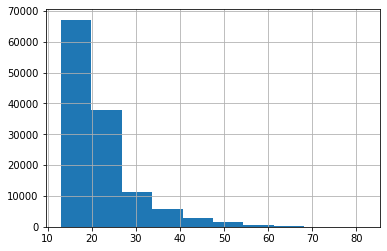

In [63]:
dados['NU_IDADE'].hist()

Primeiramente o gráfico mostrou apenas 10 categorias, trazendo uma impressão que as pessoas entre 13 e 20 anos são as que mais participam do ENEM. Apesar de ser verdade, a quantidade de pessoas entre 13 e 15 anos que participam não é a mesma das de 17 anos. Para analisar com mais clareza os dados, iremos criar mais divisões dentro do histograma.

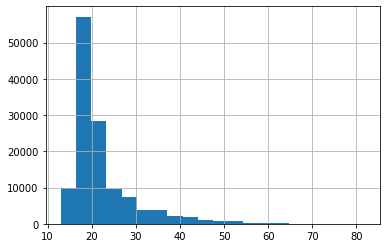

In [64]:
dados['NU_IDADE'].hist(bins = 20)

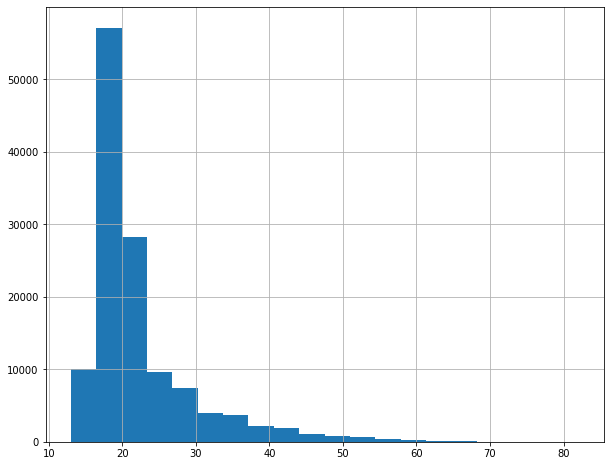

In [65]:
dados['NU_IDADE'].hist(bins = 20, figsize=(10,8))

In [66]:
dados['IN_TREINEIRO']

0         1
1         0
2         0
3         0
4         1
         ..
127375    0
127376    0
127377    0
127378    0
127379    0
Name: IN_TREINEIRO, Length: 127380, dtype: int64

In [67]:
dados.query('IN_TREINEIRO == 1')

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,...,A,A,A,A,B,A,C,A,B,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,...,A,A,A,B,A,A,D,A,A,B
12,190001005076,2019,1506138,Redenção,15,PA,15,M,1,3,...,B,A,A,B,B,A,C,A,A,B
14,190001005081,2019,1506807,Santarém,15,PA,17,F,1,3,...,A,A,A,B,A,A,D,A,A,B
16,190001005202,2019,1502301,Capitão Poço,15,PA,17,F,1,3,...,B,A,A,B,B,A,C,A,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127328,190006117441,2019,3126752,Franciscópolis,31,MG,16,M,3,3,...,A,A,A,B,A,A,D,A,A,B
127340,190006117776,2019,4305108,Caxias do Sul,43,RS,17,F,1,1,...,B,A,B,A,A,A,C,A,C,B
127349,190006118483,2019,2511301,Piancó,25,PB,15,F,1,1,...,A,A,A,B,A,A,B,A,A,A
127350,190006118551,2019,2611606,Recife,26,PE,16,M,1,1,...,B,A,B,E,B,B,E,B,B,B


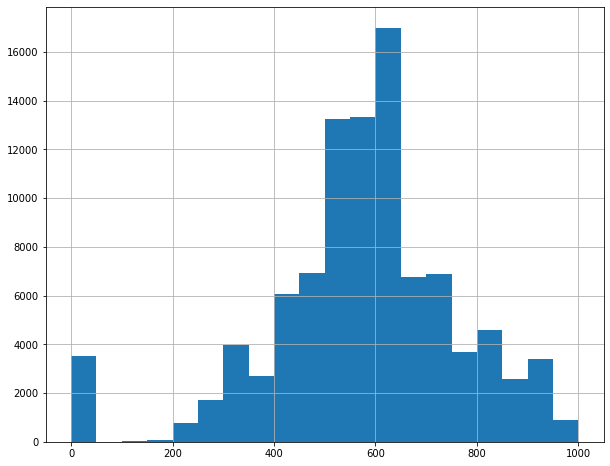

In [68]:
dados['NU_NOTA_REDACAO'].hist(bins=20, figsize=(10,8))

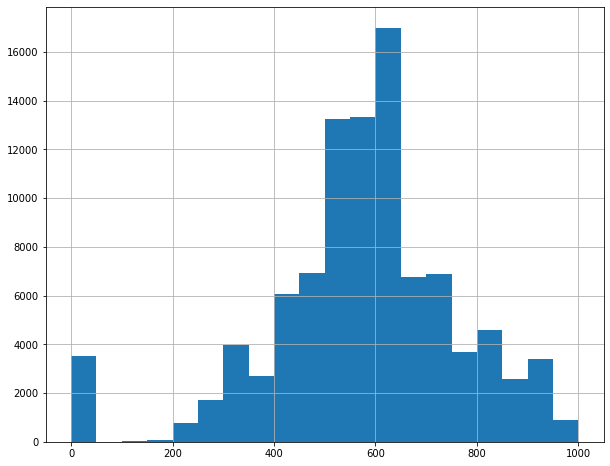

In [69]:
dados['NU_NOTA_REDACAO'].hist(bins=20, figsize=(10,8))

In [70]:
dados['NU_NOTA_REDACAO'].mean()

571.5700253970197

In [71]:
dados['NU_NOTA_REDACAO'].std()

188.07645455749753

In [72]:
provas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']

dados[provas].describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO
count,92758.000000,98043.000000,92758.000000,98043.000000,98043.000000
mean,477.964015,507.365912,523.555206,520.463928,571.570025
std,76.296099,82.972839,109.416939,64.556578,188.076455
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,418.000000,447.900000,435.300000,483.700000,480.000000
50%,470.200000,510.900000,501.600000,526.100000,580.000000
75%,533.300000,567.100000,598.200000,565.100000,680.000000
max,797.300000,809.400000,985.000000,801.700000,1000.000000


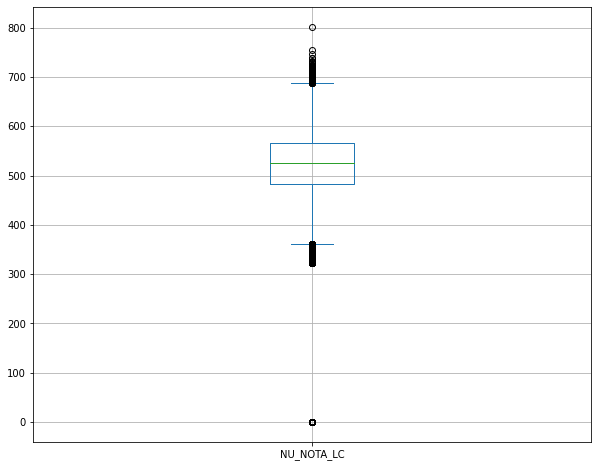

In [73]:
dados['NU_NOTA_LC'].plot.box(grid = True, figsize=(10,8))

## 2. Desafios

### Desafio 01: Proporção dos inscritos por idade

Ao saber a contagem de cada idade, foi questionado: Qual a proporção de participantes do ENEM por idade?

Para este desafio, irei criar uma estrutura de dataset temporária, que terá duas colunas: a idade do participante e a contagens de participantes por idade. Depois, uma terceira coluna será usada para receber o valor da porcentagem.

In [74]:
idades = dados['NU_IDADE'].value_counts().index
contagem = dados['NU_IDADE'].value_counts().values

temp = {'Idades': idades, 'Contagem': contagem}

proporção = pd.DataFrame(data = temp)

proporção['Percentual (%)'] = round((proporção['Contagem']/127380)*100,2)

proporção

,Idades,Contagem,Percentual (%)
0,18,21452,16.84
1,17,21256,16.69
2,19,14418,11.32
3,20,10413,8.17
4,16,7830,6.15
...,...,...,...
60,73,2,0.00
61,75,2,0.00
62,77,1,0.00
63,82,1,0.00


Para conferir, irei utilizar o parâmetro *normalize* da função *value_counts()*. Esse argumento automaticamente calcula a proporção de cada termo.

In [75]:
dados['NU_IDADE'].value_counts(normalize=True)

18    0.168409
17    0.166871
19    0.113189
20    0.081748
16    0.061470
        ...   
73    0.000016
75    0.000016
77    0.000008
82    0.000008
76    0.000008
Name: NU_IDADE, Length: 65, dtype: float64

A maneira utilizando o argumento da função é mais rápido e eficiente, porém não sabemos a informação da contagem em cada estado. Ao criar o DataFrame conseguimos manter essa informação caso seja necessário para alguma análise. Outro ponto negativo da criação estão na necessidade de validar os dados utilizando a função *value_counts()*.

### Desafio 02: Descobrir de quais estados são os inscritos com 13 anos

Para descobrir os estados, usaremos a propriedade *.loc*.

In [76]:
resposta = dados.loc[dados['NU_IDADE']==13]

resposta

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
57359,190003297248,2019,3504107,Atibaia,35,SP,13,F,1,1,...,B,A,A,B,A,A,D,B,B,B
95630,190004825557,2019,5107602,Rondonópolis,51,MT,13,M,1,1,...,A,A,A,B,B,A,B,A,A,B
98197,190004926952,2019,1600303,Macapá,16,AP,13,M,1,3,...,B,A,A,C,B,A,E,A,B,B
116501,190005659236,2019,2917508,Jacobina,29,BA,13,M,1,3,...,B,A,A,D,A,B,C,B,C,B


Os alunos com 13 anos são dos estados de São Paulo, Mato Grosso, Amapá e Bahia. 3 são homens e 1 mulher. Nenhum marcou que usaria o ENEM apenas como treino de seus conhecimentos.

### Desafio 03: Adicionar um título no gráfico

Com o gráfico pronto, devemos trazer o máximo de informações possíveis. Uma delas é o título do gráfico.

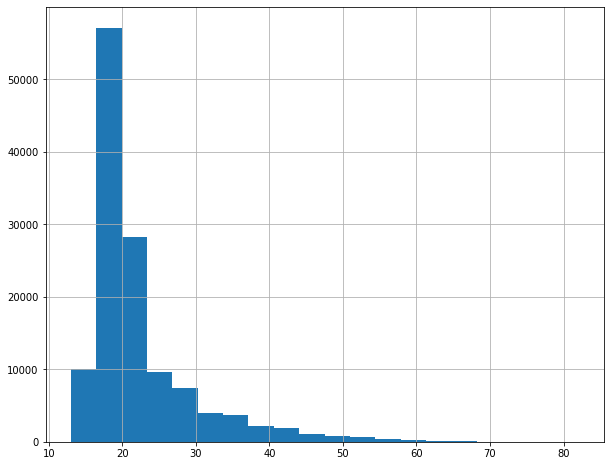

In [77]:
dados['NU_IDADE'].hist(bins = 20, figsize=(10,8))

Ao gerar o gráfico, o Pandas utiliza a biblioteva Matplotlib. Para adicionar o título, irei utilizar uma propriedade da mesma.

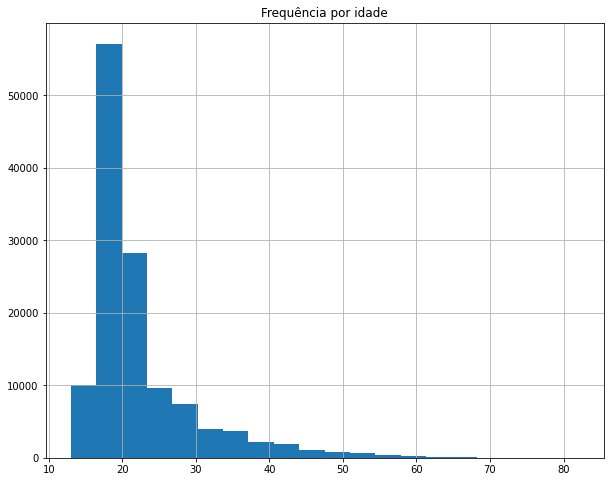

In [78]:
import matplotlib.pyplot as plt


dados['NU_IDADE'].hist(bins = 20, figsize=(10,8))
plt.title('Frequência por idade')
plt.show()

Uma outra maneira de fazer o gráfico e também de inserir o título é utilizando a função *plot()* do pandas.

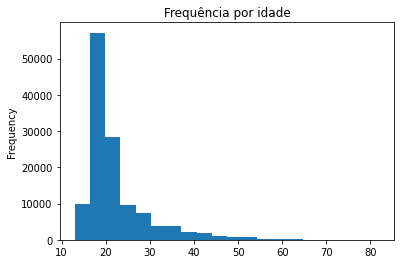

In [79]:
dados['NU_IDADE'].plot(kind = 'hist', title = 'Frequência por idade', bins = 20)

### Desafio 04: Plotar os Histogramas das idades dos treineiros e não treineiros

Para fazermos isso, irei utilizar a função *query* antes de criar os gráficos.

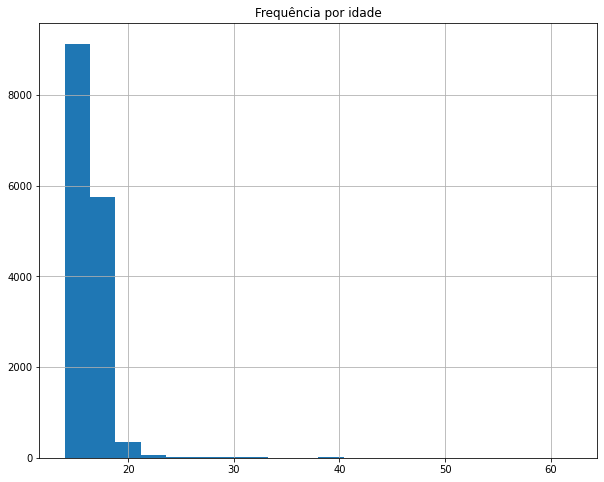

In [80]:
treineiros = dados.query('IN_TREINEIRO == 1')

treineiros['NU_IDADE'].hist(bins = 20, figsize=(10,8))
plt.title('Frequência por idade')
plt.show()

Para mostrar a possibilidade, irei utilizar as duas formas de exibição de título de gráfico. 

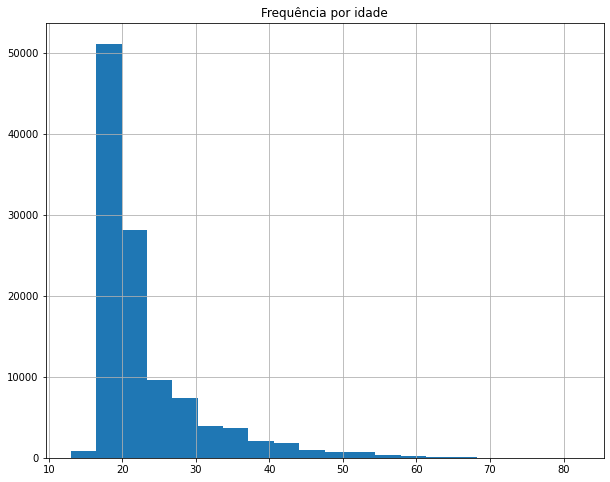

In [81]:
nao_treineiros = dados.query('IN_TREINEIRO == 0')

nao_treineiros['NU_IDADE'].hist(bins = 20, figsize=(10,8))
plt.title('Frequência por idade')
plt.show()

### Desafio 05: Comparar as distribuições das provas em inglês e espanhol

Foi pedido para criar um gráfico boxplot dividindo a nota de Linguagens e códigos de acordo com a língua estrangeira selecionada. Primeiro iremos separar as notas por língua estrangeira com o método *query* e depois incluiremos o boxplot.

In [82]:
dados['TP_LINGUA']

0         1
1         1
2         1
3         1
4         0
         ..
127375    1
127376    0
127377    1
127378    1
127379    0
Name: TP_LINGUA, Length: 127380, dtype: int64

De acordo com o dicionário, a coluna 'TP_LINGUA' informa qual a língua estrangeira selecionada: 0 para Inglês e 1 para espanhol.

Primeiramente tentei criar 2 dataframes para cada opção de língua estrangeira. Porém tive dificuldades de organizar os dois boxplot em uma única imagem para comparação.

Pesquisando um pouco, encontrei esse [link](https://www.geeksforgeeks.org/box-plot-visualization-with-pandas-and-seaborn/) que traz dicas para criar boxplot de acordo com algum filtro.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


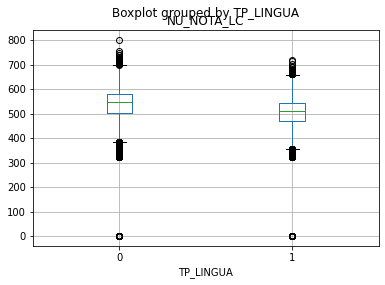

In [83]:
dados.boxplot(by='TP_LINGUA', column = ['NU_NOTA_LC'], grid = True)

Analisando o boxplot, percebe-se que quem escolheu inglês como língua estrangeira teve um desempenho melhor do que quem escolheu o espanhol. Essa diferença é pequena, no entanto.

### Desafio 06: Explorar as documentações e visualizações com matplotlib ou pandas e gerar novas visualizações.

Como desafio final, a exploração de documentação de visualizações serve não só como aprendizado inicial, mas também como lembrança de tipos diferentes de gráficos para comparação e verificação de relação dentro do dataset. 

Para esse desafio, usarei apenas a bilioteca [MatplotLib](https://matplotlib.org/stable/index.html). Irei ler a documentação e escolher 3 gráficos para gerar visualizações diferentes dos dados disponíveis.

Utilizando o Matplotlib também permite mudar algumas configurações dos gráficos como título, cores e tamanho da figura rapidamente.

#### [Violin Plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.violinplot.html#matplotlib.axes.Axes.violinplot)

O *Violin Plot* tem como objetivo mostrar os dados da mesma forma que o *Box Plot*, trazendo também a densidade dos dados em determinado valor.

/usr/local/lib/python3.7/dist-packages/numpy/linalg/linalg.py:2158: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


<function matplotlib.pyplot.show>

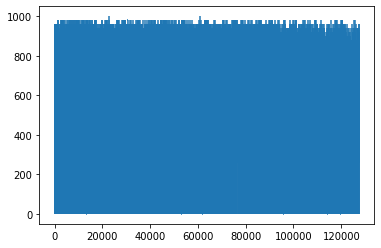

In [84]:
import matplotlib.pyplot as plt

plt.violinplot(dados[['NU_NOTA_CN','NU_NOTA_REDACAO']], widths = 2)
plt.show

Como o gráfico ficou ilegível, mesmo com tentativas de formatação, decidi mudar a biblioteca. Para esse gráfico, estarei usando a biblioteca [Seaborn](https://seaborn.pydata.org/index.html). Essa biblioteca é baseada na Matplotlib, tendo, porém, mais opções de gráficos.

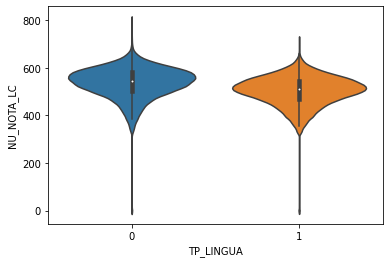

In [85]:
import seaborn as sns


sns.violinplot(data = dados, x = 'TP_LINGUA', y ='NU_NOTA_LC')


O gráfico de violinos traz uma informação parecida com o boxplot, em que se percebe uma nota maior entre os alunos que escolheram a língua inglesa. Podemos ver também que os alunos que escolheram espanhol tem uma dispersão menor entre as notas.

#### [Pie chart](https://matplotlib.org/stable/plot_types/stats/pie.html#sphx-glr-plot-types-stats-pie-py)

Um gráfico normalmente usado para comparar proporções é o gráfico de pizza. Apesar de não ser muito aceito por conta de seus pontos negativos, há casos específicos em que ele pode ser utilizado.

Nesse dataset, um bom uso para o gráfico de pizza é comparar o número de incritos homens e mulheres.

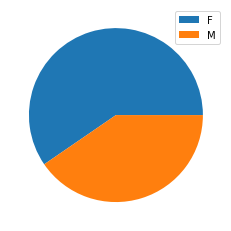

In [86]:
import matplotlib.pyplot as plt

plt.pie(dados['TP_SEXO'].value_counts())
plt.legend(dados['TP_SEXO'].value_counts().index)

Apesar de verificarmos que temos mais mulheres participando do ENEM do que homens, é difícil saber o quão maior é o número de mulheres. Em uma análise rápida, podemos usar esse tipo de gráfico, porém, para análises mais robustas, o ideal é encontrar outras visualizações que se adequam mais a necessidade do momento.

#### [Scatter Plot](https://matplotlib.org/stable/plot_types/basic/scatter_plot.html#sphx-glr-plot-types-basic-scatter-plot-py)

Os dois gráficos usados anteriormente servem para comparar os valores dos dados. Além desse estilo, há gráficos que ajudam também a mostrar uma relação entre duas grandezas presentes no DataFrame.

Um dos gráficos que pode ser utilizado com esse interesse é o gráfico de dispersão. Nesse gráfico, irei tentar encontrar a relação entre as notas de redação e as idades dos participantes.

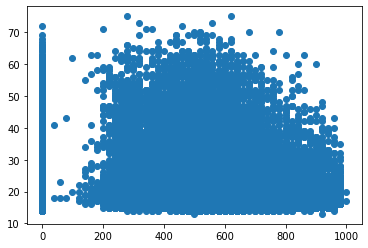

In [87]:
import matplotlib.pyplot as plt


plt.scatter(x = dados['NU_NOTA_REDACAO'], y = dados['NU_IDADE'])

Como o dataset tem uma quantidade grande de dados, o gráfico não mostra uma tendencia clara. Conseguimos perceber que os participantes que tiraram 0 na redação são de idades variadas. Nesse gráfico podemos entender que a maioria das pessoas tirou nota entre 300-700, tendo que ser feitas análises futuras para podermos comprovar isto.

# Aula 02: Análise Exploratória de Dados

Após uma introdução à área e às bibliotecas, nesta aula o objetivo é se aprofundar mais na relação dos aspectos sócio-econômicos em conjunto com as notas dos alunos.

### 1. Aula

In [88]:
dados.query('NU_IDADE ==13')

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
57359,190003297248,2019,3504107,Atibaia,35,SP,13,F,1,1,...,B,A,A,B,A,A,D,B,B,B
95630,190004825557,2019,5107602,Rondonópolis,51,MT,13,M,1,1,...,A,A,A,B,B,A,B,A,A,B
98197,190004926952,2019,1600303,Macapá,16,AP,13,M,1,3,...,B,A,A,C,B,A,E,A,B,B
116501,190005659236,2019,2917508,Jacobina,29,BA,13,M,1,3,...,B,A,A,D,A,B,C,B,C,B


Apesar de disperso, o grupo apresenta uma fatia muito pequena da população. Podemos acrescentar os alunos com idade de 14 anos, tendo em vista que são idades muito próximas.



In [89]:
 dados.query('NU_IDADE <= 14')['SG_UF_RESIDENCIA'].value_counts()

PE    18
CE    15
BA    14
PA    12
MG    11
SP    11
MA     9
PI     7
GO     7
PB     7
MT     4
AM     4
DF     4
TO     3
SE     3
PR     3
AL     2
RO     2
SC     2
AP     1
RN     1
ES     1
AC     1
RS     1
RJ     1
MS     1
Name: SG_UF_RESIDENCIA, dtype: int64

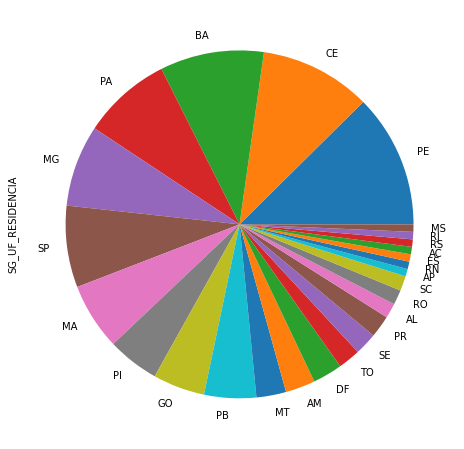

In [90]:
alunos_menor_quatorze = dados.query('NU_IDADE <= 14')

alunos_menor_quatorze['SG_UF_RESIDENCIA'].value_counts().plot.pie(figsize = (10,8)) 

Como temos muitos estados, o gráfico de pizza não mostra uma informação concisa e com fácil compreensão. Uma alternativa é o gráfico de barras.

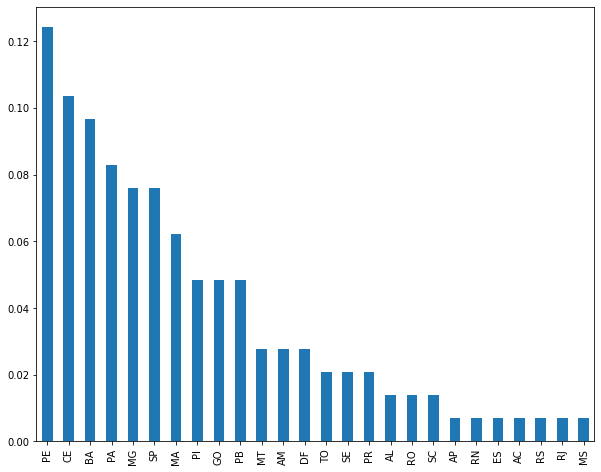

In [91]:
alunos_menor_quatorze['SG_UF_RESIDENCIA'].value_counts(normalize=True).plot.bar(figsize = (10,8)) 

Além da idade, temos também as perguntas sócio-economicas. Essas perguntas incluem profissão e nível de escolaridade dos pais, entre outros. As respostas estão nas colunas Q001 até Q025. Iremos focar na **coluna Q006**, que traz a informação da renda familiar mensal, incluindo o participante, sendo categórica com as letras de **A** a **Q** 

O dicionário a classifica assim:

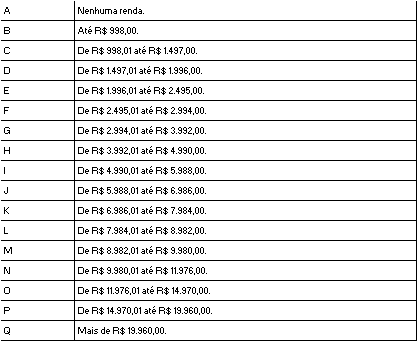


Para comparar as notas, iremos usar o boxplot da biblioteca Seaborn. Além de trazer mais opções de gráficos, ela também facilita a construção de alguns gráficos mais usados.

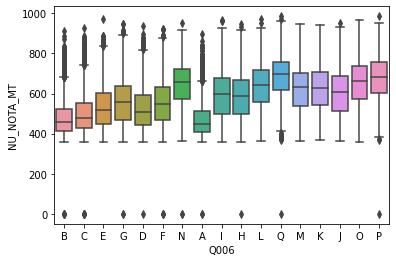

In [92]:
import seaborn as sns


sns.boxplot(x = "Q006", y = 'NU_NOTA_MT', data = dados)

Apesar de fazermos o gráfico, o mesmo não está ordenado por renda familiar mensal. A bilioteca ajuda a trabalhar isso, e como a mesma é baseada em Matplotlib, podemos usar as duas em conjunto.

Text(0.5, 1.0, 'Boxplot das notas de matemática pela renda')

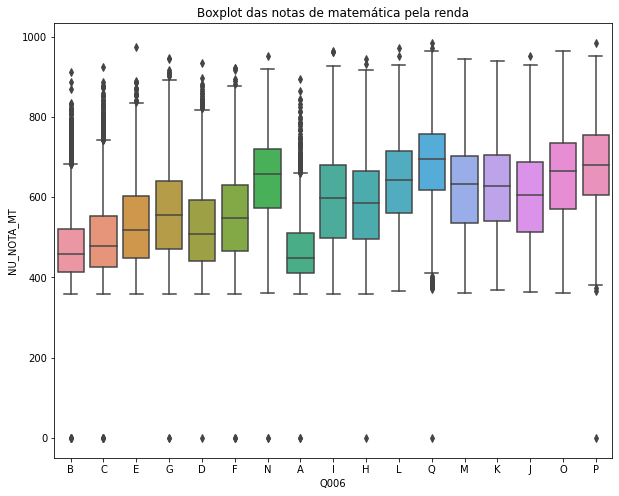

In [93]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 8))

sns.boxplot(x = "Q006", y = 'NU_NOTA_MT', data = dados)
plt.title("Boxplot das notas de matemática pela renda")


Apesar do título, ainda precisamos ordenar o eixo X. criaremos uma variável para isso, que irá ser incluida nos parâmetros para o gráfico.

In [94]:
renda_ordenada = dados['Q006'].unique()
renda_ordenada.sort()
renda_ordenada

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q'], dtype=object)

Text(0.5, 1.0, 'Boxplot das notas de matemática pela renda')

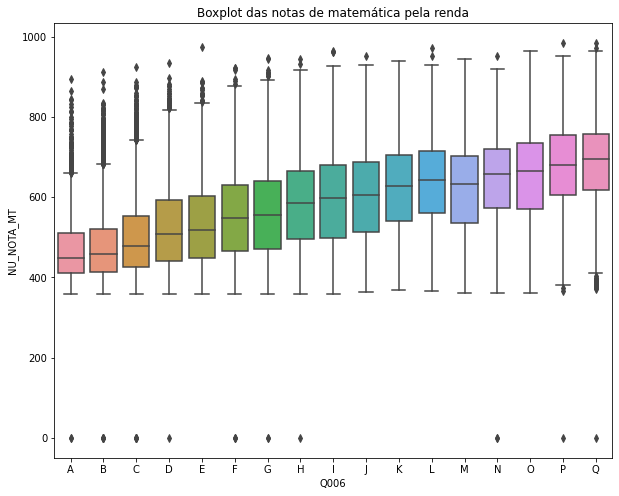

In [95]:
plt.figure(figsize=(10, 8))

sns.boxplot(x = "Q006", y = 'NU_NOTA_MT', data = dados, order = renda_ordenada)
plt.title("Boxplot das notas de matemática pela renda")


Com esse gráfico, percebemos que a nota de matemática aumenta caso a renda familiar também aumente. Além disso, o número de outliers também é alterado quando a renda aumenta, porém em proporção inversa.

Uma curiosidade está na faixa de renda M, de R$ 8,982,01 até R$ 9.980,00. Essa foi a única faixa de renda com mediana menor que a anterior.

Além da nota de matemática, os participantes tem mais 4 notas. Para entender melhor a nota do ENEM, podemos fazer uma somatória de todas as notas das provas.

In [96]:
provas

['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']

In [97]:
dados[provas].sum()

NU_NOTA_CN         44334986.1
NU_NOTA_CH         49743676.1
NU_NOTA_MT         48563933.8
NU_NOTA_LC         51027844.9
NU_NOTA_REDACAO    56038440.0
dtype: float64

In [98]:
dados[provas].sum(axis=1)
dados['NU_NOTA_TOTAL'] = dados[provas].sum(axis=1)

dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,...,A,A,A,B,A,C,A,B,B,2288.9
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,...,A,A,B,A,A,B,A,A,B,1184.6
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,...,A,A,B,A,B,B,A,A,B,2350.5
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,...,A,A,B,A,A,B,A,A,B,2555.7
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,...,A,A,B,A,A,D,A,A,B,2803.5


Text(0.5, 1.0, 'Boxplot das notas de matemática pela renda')

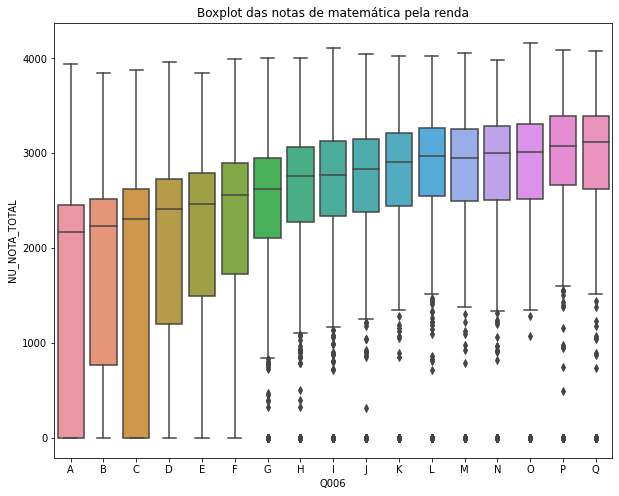

In [99]:
plt.figure(figsize=(10, 8))

sns.boxplot(x = "Q006", y = 'NU_NOTA_TOTAL', data = dados, order = renda_ordenada)
plt.title("Boxplot das notas de matemática pela renda")

Nesse gráfico, percebemos a que as classes A e C tem muitos valores como 0 na nota geral. Podemos analisar isso mais a fundo e entender o que pode ter ocorrido.

Iremos plotar agora um histograma para entender a distribuição das notas.

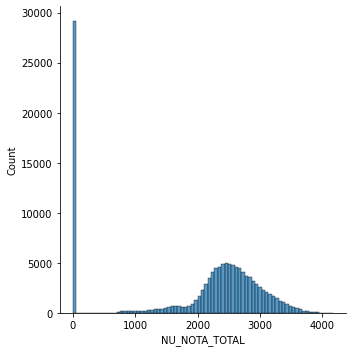

In [100]:
sns.displot(dados, x = 'NU_NOTA_TOTAL')

Nesse gráfico vemos que as pessoas que tiraram 0 em totas as notas do ENEM são maioria. Se analisarmos a curva sem as notas, vemos uma tendência a uma curva normal.

Vamos agora focar nas pessoas que tiraram 0 em todas as provas

In [101]:
provas.append('NU_NOTA_TOTAL')


dados.query("NU_NOTA_TOTAL == 0")[provas]

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_TOTAL
10,NaN,NaN,NaN,NaN,NaN,0.0
11,NaN,NaN,NaN,NaN,NaN,0.0
26,NaN,NaN,NaN,NaN,NaN,0.0
38,NaN,NaN,NaN,NaN,NaN,0.0
40,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...
127351,NaN,NaN,NaN,NaN,NaN,0.0
127365,NaN,NaN,NaN,NaN,NaN,0.0
127366,NaN,NaN,NaN,NaN,NaN,0.0
127368,NaN,NaN,NaN,NaN,NaN,0.0


Essas notas 0 podem estar atrapalhando a nossa análise. Podemos tratar elas de diversas maneiras. Para termos uma análise melhor, iremos ignorar as pessoas com *NU_NOTA_TOTAL* igual a 0, afinal mostra que elas não tiveram notas.

In [102]:
dados_sem_nota_zero = dados.query("NU_NOTA_TOTAL != 0")
dados_sem_nota_zero.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,...,A,A,A,B,A,C,A,B,B,2288.9
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,...,A,A,B,A,A,B,A,A,B,1184.6
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,...,A,A,B,A,B,B,A,A,B,2350.5
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,...,A,A,B,A,A,B,A,A,B,2555.7
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,...,A,A,B,A,A,D,A,A,B,2803.5


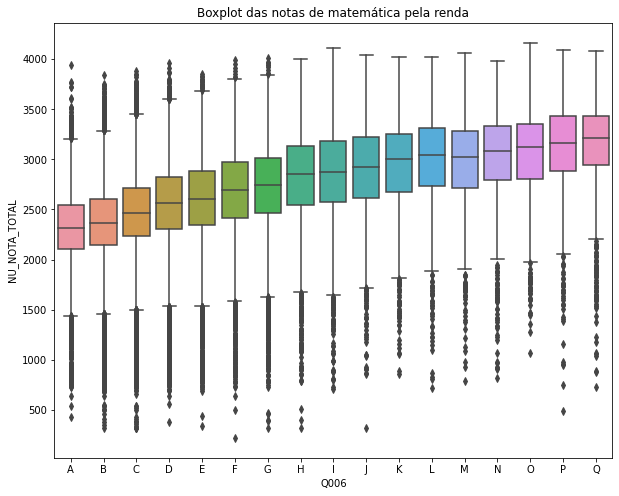

In [103]:
desenha_boxplot(pergunta = "Q006", nota='NU_NOTA_TOTAL', dados=dados_sem_nota_zero)

Text(0.5, 1.0, 'Boxplot das notas de matemática pela renda')

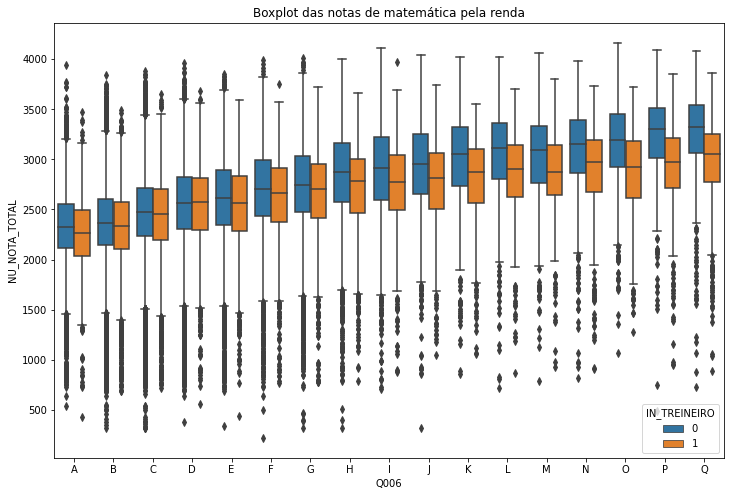

In [104]:
plt.figure(figsize=(12, 8))

sns.boxplot(x = "Q006", y = 'NU_NOTA_TOTAL', data = dados_sem_nota_zero, order = renda_ordenada, hue = 'IN_TREINEIRO')
plt.title("Boxplot das notas de matemática pela renda")

## 2. Desafios

### MEGA DESAFIO DA THAINÁ: Pegar a amostra completa dos alunos de 13 e 14 anos

Esse desafio terá que ser feitos em um outro momento. A imersão foi lançada em outubro de 2020 utilizando os microdados do ENEM de 2019. Esses dados estavam disponíveis para consulta e criação de *samples* durante a imersão.

Porém não fiz a imersão nas datas originais e sim em março de 2022, o que gerou um problema. Em novembro de 2021, o MEC informou que estava adequando os microdados do ENEM 2020 à nova Lei Geral de Prodeção dos Dados (LGPD) <sup>[link](https://g1.globo.com/educacao/noticia/2021/11/09/inep-segura-ha-pelo-menos-dois-meses-divulgacao-publica-dos-microdados-do-enem-2020.ghtml)</sup> e que não poderia disponibilizar naquele momento. Desde então os dados do ENEM 2020 foram disponibilizados. Porém, ao disponibilizar os dados do ano de 2020, o MEC também removeu os dados de todos os anos anteriores, incluindo o de 2019 <sup>[link](https://educacao.uol.com.br/noticias/agencia-estado/2022/02/21/inep-exclui-microdados-do-censo-escolar-e-do-enem-e-oculta-informacoes-do-sistema.html)</sup>.

Caso os microdados estejam novamente disponíveis, irei retormar o desafio.

### Desafio do Gui bonzinho: aumentar a amostra para alunos menor de idade e comparar a proporção por estado.

O número de alunos ainda era pequeno: 145 alunos dentro de um total de 127300. Por isso, foi sugerido aumentar a amostra para todos os alunos menores de idade. 

In [105]:
alunos_menor_idade = dados.query('NU_IDADE <= 17')

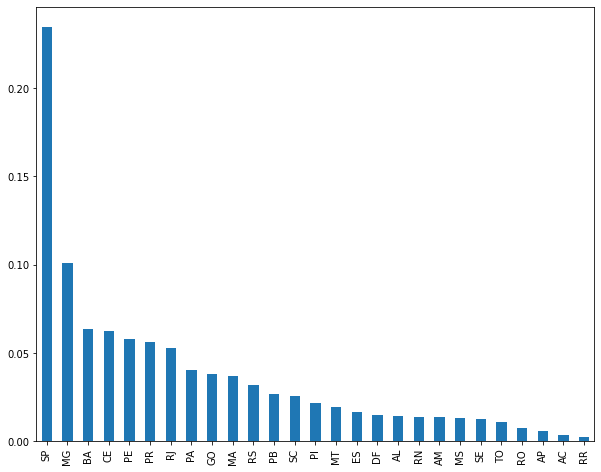

In [106]:
alunos_menor_idade['SG_UF_RESIDENCIA'].value_counts(normalize=True).plot.bar(figsize = (10,8)) 

Dentre os alunos menores de idade, se percebe uma proporção esperada a da população brasileira.

### Desafio 03: Criar uma função para plotar o boxplot do seaborn

In [107]:
def desenha_boxplot(pergunta,nota,dados):

    x = pergunta
    y = nota
    dados = dados

    ordem = dados[x].unique()
    ordem.sort()

    plt.figure(figsize=(10, 8))

    sns.boxplot(x = x, y = y, data = dados, order = ordem)
    plt.title("Boxplot das notas de matemática pela renda")
    plt.show()

A função foi feita com base que você pode desenhar rapidamente o boxplot de cada pergunta do sócio economico, de acordo com a nota desejada.

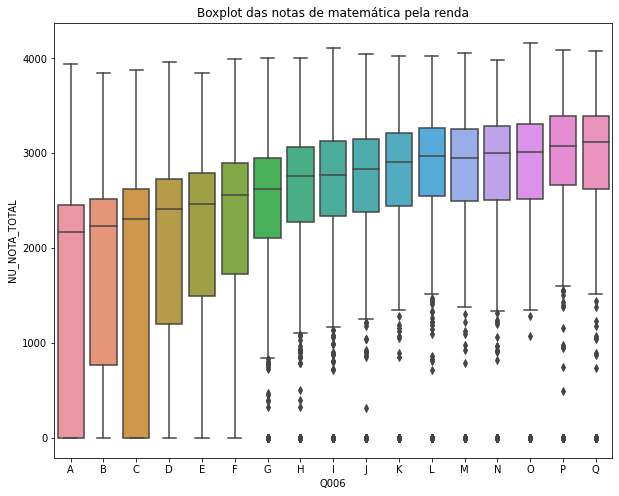

In [108]:
desenha_boxplot(pergunta = 'Q006', nota = 'NU_NOTA_TOTAL',dados = dados)

### Desafio 04: Verificar se quem zerou a prova foi eliminado ou não estava presente

Para verificar a presença ou eliminação do candidato, temos que usar as seguintes colunas

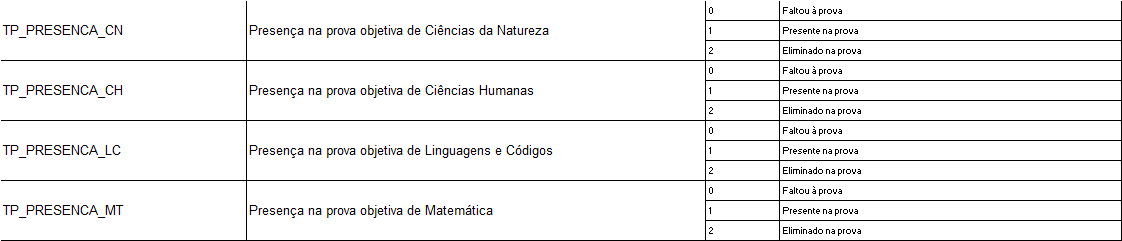

Apesar de apresentar a opção 'Eliminado na prova', não há uma explicação clara que motivou a eliminação do aluno.

In [109]:
status = ['TP_PRESENCA_CN','TP_PRESENCA_MT','TP_PRESENCA_LC','TP_PRESENCA_CH']

dados.query("NU_NOTA_TOTAL == 0")[status]

,TP_PRESENCA_CN,TP_PRESENCA_MT,TP_PRESENCA_LC,TP_PRESENCA_CH
10,0,0,0,0
11,0,0,0,0
26,0,0,0,0
38,0,0,0,0
40,0,0,0,0
...,...,...,...,...
127351,0,0,0,0
127365,0,0,0,0
127366,0,0,0,0
127368,0,0,0,0


Vamos agora analisar cada coluna individualmente.

##### Ciência da Natureza

In [110]:
dados.query("NU_NOTA_TOTAL == 0")['TP_PRESENCA_CN'].unique()

array([0, 1])

Dentre as pessoas que tem nota 0 total, houveram pessoas que estavam presentes no dia da prova de Ciências da Natureza, mas que por algum motivo tiraram 0 na mesma. Vamos descobrir quantos foram.

In [111]:
presentes_cn = dados.query("NU_NOTA_TOTAL == 0 & TP_PRESENCA_CN == 1")

print(f'O número de alunos presentes na prova de Ciência da Natureza que tiraram 0 na nota total foi de {len(presentes_cn)}')

O número de alunos presentes na prova de Ciência da Natureza que tiraram 0 na nota total foi de 5


##### Linguagens e Códigos

In [112]:
dados.query("NU_NOTA_TOTAL == 0")['TP_PRESENCA_LC'].unique()

array([0, 2, 1])

Além de pessoas que estavam presentes, também houveram pessoas que foram eliminadas da prova e por isso ficaram com 0 na nota total. vamos ver a contagem de cada caso

In [113]:
dados.query("NU_NOTA_TOTAL == 0")['TP_PRESENCA_LC'].value_counts()

0    29001
2      120
1       41
Name: TP_PRESENCA_LC, dtype: int64

Conseguimos assim ver que 120 pessoas foram eliminadas da prova de Linguagem e Códigos, sendo 41 pessoas que estavam presentes na prova, mas que também tiraram 0 na nota total.

##### Matemática e suas Tecnologias

In [114]:
dados.query("NU_NOTA_TOTAL == 0")['TP_PRESENCA_MT'].unique()

array([0, 1])

Novamente não encontramos alunos eliminados, porém encontramos alunos presentes que tiraram 0 na prova.

In [115]:
presentes_mt = dados.query("NU_NOTA_TOTAL == 0 & TP_PRESENCA_MT == 1")

print(f'O número de alunos presentes na prova de Matemática e suas Tecnologias que tiraram 0 na nota total foi de {len(presentes_mt)}')

O número de alunos presentes na prova de Matemática e suas Tecnologias que tiraram 0 na nota total foi de 5


##### Ciências Humanas

In [116]:
dados.query("NU_NOTA_TOTAL == 0")['TP_PRESENCA_CH'].unique()

array([0, 2, 1])

In [117]:
dados.query("NU_NOTA_TOTAL == 0")['TP_PRESENCA_CH'].value_counts()

0    29001
2      120
1       41
Name: TP_PRESENCA_CH, dtype: int64

Há uma igualgade de valores entre os alunos presentes nas provas de Matemática e Ciências da Natureza e um outro valor similar entre aqueles das Ciências Humanas e Linguagens e Códigos. Isso acontece porque essas provas foram aplicadas no mesmo dia.

### Desafio 05: Quem é eliminado tira zero ou será NaN (não teve registro de notas)

Com as analises do desafio anterior, percebemos que só há alunos marcados como eliminados nas provas de Linguagens e Códigos e na de Ciências Humanas. 

In [118]:
dados.query('TP_PRESENCA_CH == 2 | TP_PRESENCA_LC == 2')[provas]

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_TOTAL
77,NaN,NaN,NaN,NaN,NaN,0.0
396,NaN,NaN,NaN,NaN,NaN,0.0
446,NaN,NaN,NaN,NaN,NaN,0.0
609,NaN,NaN,NaN,NaN,NaN,0.0
728,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...
124695,NaN,NaN,NaN,NaN,NaN,0.0
125216,NaN,NaN,NaN,NaN,NaN,0.0
125784,NaN,NaN,NaN,NaN,NaN,0.0
126769,NaN,NaN,NaN,NaN,NaN,0.0


Assim vemos apenas os alunos que foram eliminados das provas. A principio percebe-se que os alunos que foram eliminados receberam valores NaN em todas as notas. Para conferir, podemos usar o método *dropna()* ou o método *describe()*

In [119]:
dados.query('TP_PRESENCA_CH == 2 | TP_PRESENCA_LC == 2')[provas].describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_TOTAL
count,6.000000,0.0,6.000000,0.0,0.0,126.000000
mean,487.466667,NaN,529.150000,NaN,NaN,48.410317
std,110.797539,NaN,152.551142,NaN,NaN,222.878026
min,371.400000,NaN,373.300000,NaN,NaN,0.000000
25%,395.100000,NaN,444.575000,NaN,NaN,0.000000
50%,477.500000,NaN,458.100000,NaN,NaN,0.000000
75%,555.625000,NaN,646.825000,NaN,NaN,0.000000
max,649.100000,NaN,735.600000,NaN,NaN,1384.700000


Com o describe vemos que 6 pessoas que foram eliminadas das provas do segundo dia tiveram notas relativas do primeiro dia. Nos dias que as pessoas foram eliminadas o valor inserido foi NaN.

### Desafio 06: Verificar a proporção dos participantes de rendas mais altas e mais baixas como treineiro e não treineiro

Além de verificar a proporção, podemos encontrar os valores totais também.

Acredito que a proporção entre treineiros e nao treineiros seja diferente, tendo em vista que os participantes de faixas de rendas maiores tenham mais chances de fazer o ENEM, inclusive sendo incentivados pela família e escolas.

Para verificar a proporção, irei primeiro encontrar as contagens de treineiros e não treineiros por faixa de renda e depois calcular a proporção entre esses valores.

Para fazer a contagem, criarei um loop for, que irá calcular a contagem total de treineiros e não treineiros para cada faixa de renda. Esses valores serão incluidos em um DataFrame pandas, para depois ser feito o calculo da proporção. Esse é um método um pouco mais longo, mas que irá me permitir plotar um gráfico com as informações por faixa de renda depois.

In [241]:
renda = dados["Q006"].unique()
renda.sort()
proporcao_renda = pd.DataFrame()
proporcao_renda['Faixa de Renda'] = renda
treineiros = []
nao_treineiros = []


for i in range(len(renda)):
    treineiro_renda = dados.query(f'Q006 == "{renda[i]}"')
    contagem = treineiro_renda['IN_TREINEIRO'].value_counts()
    treineiros.append(contagem[1])
    nao_treineiros.append(contagem[0])

Com o loop feito, incluirei os valores no DataFrame.

In [242]:
proporcao_renda['Total Treineiros'] = treineiros
proporcao_renda['Total Não Treineiros'] = nao_treineiros
proporcao_renda['Total Inscritos'] = proporcao_renda['Total Treineiros'] + proporcao_renda['Total Não Treineiros']

In [243]:
proporcao_renda

,Faixa de Renda,Total Treineiros,Total Não Treineiros,Total Inscritos
0,A,596,5244,5840
1,B,3027,28763,31790
2,C,2567,30027,32594
3,D,1199,11356,12555
4,E,1267,10596,11863
5,F,855,4785,5640
6,G,1057,6470,7527
7,H,965,3851,4816
8,I,713,2839,3552
9,J,471,1628,2099


In [240]:
dados['Q006'].value_counts()

C    32594
B    31790
D    12555
E    11863
G     7527
A     5840
F     5640
H     4816
I     3552
J     2099
N     1533
K     1482
Q     1436
O     1327
P     1132
L     1104
M     1090
Name: Q006, dtype: int64

Utilizei o método *value_counts* como confirmação dos valores. A criação da coluna 'Total de Inscritos' também é útil para a construção das colunas de proporção. 

In [247]:
proporcao_renda['% Treineiros'] = round(proporcao_renda['Total Treineiros'] / proporcao_renda['Total Inscritos'],3)*100
proporcao_renda['% Não Treineiros'] = round(proporcao_renda['Total Não Treineiros'] / proporcao_renda['Total Inscritos'],3)*100
proporcao_renda

,Faixa de Renda,Total Treineiros,Total Não Treineiros,Total Inscritos,% Treineiros,% Não Treineiros
0,A,596,5244,5840,10.2,89.8
1,B,3027,28763,31790,9.5,90.5
2,C,2567,30027,32594,7.9,92.1
3,D,1199,11356,12555,9.5,90.5
4,E,1267,10596,11863,10.7,89.3
5,F,855,4785,5640,15.2,84.8
6,G,1057,6470,7527,14.0,86.0
7,H,965,3851,4816,20.0,80.0
8,I,713,2839,3552,20.1,79.9
9,J,471,1628,2099,22.4,77.6


Analisando os valores, percebe-se que a medida que a faixa de renda aumenta, também está se aumentando o percentual de participantes treineiros, apesar do número total de participantes diminuir.

Segundo o dicionário disponível com a base de dados, foram classificados como treineiros aqueles que não iriam concluir o ensino médio no mesmo ano da prova do ENEM.

Ao fazer a prova como treineiro, o aluno consegue se preparar com mais calma e entender melhor o funcionamento da mesma, contando como experiência para o momento em que ele faça a prova como não treineiro. Além das desigualdades de tempo de estudo, qualidade no ensino e acesso à informação, esse também pode ser um dos motivos para que os estudantes com faixa de renda mais alta apresentam notas totais melhores no geral.

### Desafio 07: Fazer o mesmo boxplot olhando para a questão 25 (tem internet ou não) e fazer uma reflexão sobre o assunto e o contexto de pandemia.

Primeiro, vamos usar a função criada no desafio 3 para mostrar o boxplot.

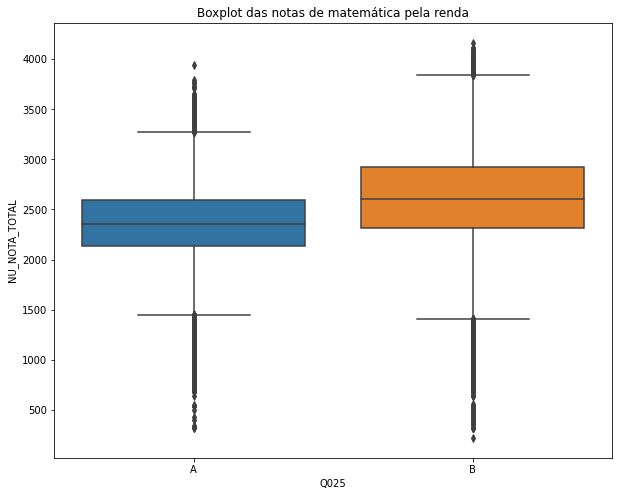

In [123]:
desenha_boxplot(pergunta = 'Q025', nota = 'NU_NOTA_TOTAL', dados = dados_sem_nota_zero)

Usando o dicionário, sabe-se que **A** mostra quem **não tem internet em casa** e **B os que possuem.**

Com esse boxplot, percebemos que os alunos que possuem internet em casa tiveram uma nota geral maior dos que aqueles sem acesso. Para o ano de 2020, pode-se esperar uma piora nas notas daqueles que não possuem acesso à internet, devido a pandemia da COVID-19.

Após o ano de 2019, já houveram duas edições do ENEM. A de 2020 já tem seus microdados disponibilizados e a de 2021 ainda não está liberada. Continuar essa análise pode trazer respostas e mostrar caminhos para que a educação no Brasil possa melhorar para todas as faixas de renda.

### Desafio Extra: Encontrar quem faz ENEM fora do estado de residencia e qual pode ser o motivo

Para encontrar os participantes que não fizeram ENEM no estado de residência, irei usar o método *query*

In [124]:
enem_fora_estado = dados.query('SG_UF_RESIDENCIA != SG_UF_PROVA')
enem_fora_estado

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
528,190001024195,2019,5107578,Rondolândia,51,MT,19,M,1,1,...,A,A,B,A,A,D,A,B,B,2548.5
572,190001026441,2019,1200401,Rio Branco,12,AC,25,F,2,3,...,A,A,B,A,A,B,A,A,B,2208.7
675,190001030292,2019,1501402,Belém,15,PA,24,M,1,3,...,A,A,B,A,B,D,A,A,B,2755.8
825,190001036308,2019,1503804,Jacundá,15,PA,15,M,1,3,...,A,A,B,A,A,B,A,A,A,0.0
1275,190001053676,2019,2111532,São Pedro da Água Branca,21,MA,20,F,1,3,...,A,A,B,A,A,D,A,A,B,2486.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127193,190006109589,2019,2507903,Juripiranga,25,PB,19,F,1,3,...,A,A,B,A,A,B,A,B,B,1989.9
127244,190006112641,2019,2511202,Pedras de Fogo,25,PB,20,F,1,3,...,A,A,B,A,A,E,A,A,B,2284.4
127316,190006117109,2019,2403400,Equador,24,RN,25,M,1,3,...,A,A,B,B,A,C,A,A,B,0.0
127348,190006118469,2019,1501402,Belém,15,PA,19,F,1,2,...,A,A,B,A,A,B,A,A,A,0.0


São 1222 alunos que não fizeram as provas no seu estado de residência. Primeiro vamos entender se os alunos realmente fizeram as provas, novamente utilizando de queries.

In [125]:
enem_fora_estado = enem_fora_estado.query('NU_NOTA_TOTAL != 0')

Com os participantes selecionados, vamos pegar as colunas 'SG_SG_UF_RESIDENCIA' e 'SG_UF_PROVA' para entender o que pode estar acontecendo.

In [126]:
enem_fora_estado.query('NU_NOTA_TOTAL != 0')[['NU_INSCRICAO','SG_UF_RESIDENCIA', 'SG_UF_PROVA']]

,NU_INSCRICAO,SG_UF_RESIDENCIA,SG_UF_PROVA
528,190001024195,MT,RO
572,190001026441,AC,RO
675,190001030292,PA,PR
1275,190001053676,MA,PA
1384,190001058219,MA,PA
...,...,...,...
126681,190006072031,MG,DF
127154,190006107976,BA,SE
127193,190006109589,PB,PE
127244,190006112641,PB,PE


Analisando alguns casos, percebemos que há casos em que as cidades de residência são próximo de divisas estaduais, como no caso de Rondolândia e Juripiranga. Talvez por isso os estudantes tiveram que fazer exames em outro estado.

Há casos porém, que o aluno pode pedir para fazer em outro estado ou até mesmo acontecer erros do sistema, que determina que o aluno faça a prova em um estado que ele não reside.

# Aula 03: Distribuições e Correlações entre notas

## 1. Aula

Nesta aula, o foco será entender as correlações entre as notas dos participantes.

Primeiramente, vamos novamente analisar a distribuição das notas por meio de um histograma, porém excluindo aqueles que tiraram notas 0.

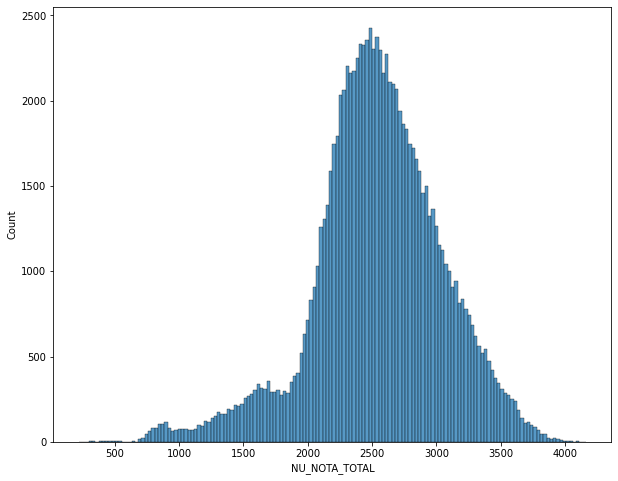

In [127]:
plt.figure(figsize = (10,8))

sns.histplot(dados_sem_nota_zero, x = 'NU_NOTA_TOTAL')

A distribuição das notas totais parece respeitar uma distribuição normal simétrica. 

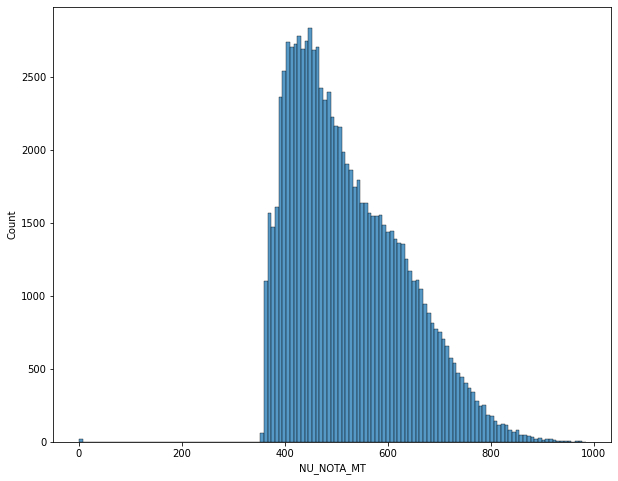

In [128]:
plt.figure(figsize = (10,8))

sns.histplot(dados_sem_nota_zero, x = 'NU_NOTA_MT')

Já a distribuição das notas de matemática parece ser assimétrica à direita. Essa assimetria pode estar relacionada a como as respostas são analisadas e as notas calculadas pelo MEC.

Além da nota de matemática, podemos também verificar a distribuição de notas da prova de Linguagens e Códigos.

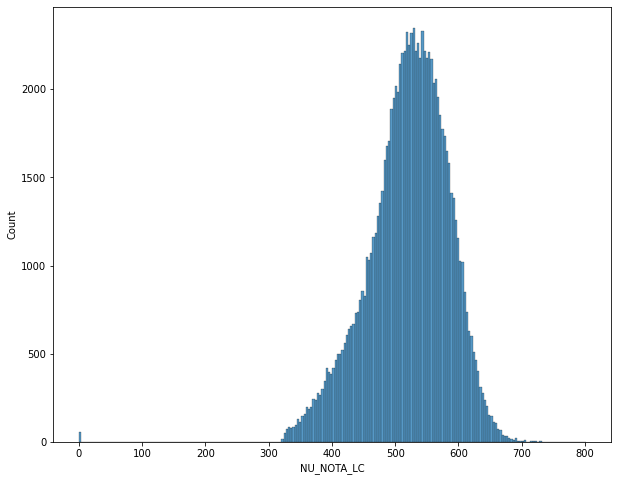

In [129]:
plt.figure(figsize = (10,8))

sns.histplot(dados_sem_nota_zero, x = 'NU_NOTA_LC')

Com o histograma, também conseguimos comparar as notas dos alunos com e sem internet:

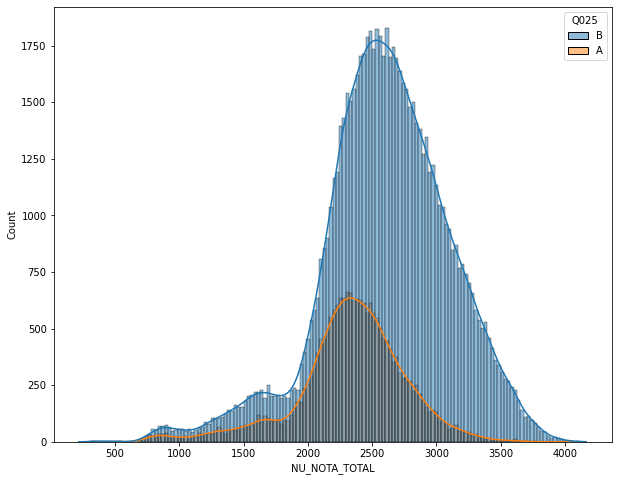

In [130]:
plt.figure(figsize = (10,8))

sns.histplot(dados_sem_nota_zero, x = 'NU_NOTA_TOTAL', hue = 'Q025', kde=True)

Apesar de ser possível, a análise fica um pouco mais confusa, afinal a comparação será entre a frequência das notas, e complexa, já que não são vistos os valores de média e mediana facilmente. Por isso o gráfico de boxplot é mais adequado para comparação de notas.

Apesar dos defeitos dos gráficos, vemos que as notas parecem ser maiores para os alunos que possuem internet em casa. Também é possível notar que a maioria dos participantes do ENEM declarou ter internet em casa.

Além de análises de notas individuais, podemos também analisar as relações das notas entre si.

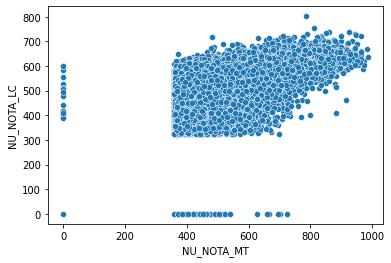

In [131]:
sns.scatterplot(data = dados_sem_nota_zero, x ='NU_NOTA_MT', y = 'NU_NOTA_LC')

O gráfico criado traz os alunos com notas 0 nas das provas. Isso ocorre pois foram removidos apenas aqueles que tiraram 0 em todas as provas. 

Para melhorar a análise do gráfico, podemos alterar algumas configurações nele:

1. Transformar a imagem em um quadrado
2. Determinar limites do eixo x
3. Determinar limites do eixo y

(-50.0, 1050.0)

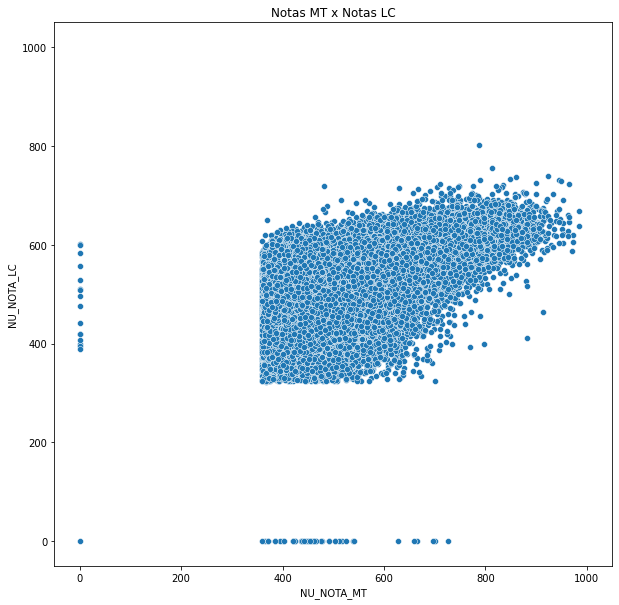

In [132]:
plt.figure(figsize=(10,10))

plt.title('Notas MT x Notas LC')
sns.scatterplot(data = dados_sem_nota_zero, x ='NU_NOTA_MT', y = 'NU_NOTA_LC')
plt.xlim((-50,1050))
plt.ylim((-50,1050))

Parece que ao aumentar a nota de uma prova, a outra também aumenta, principalmente para notas acima de 600. Para notas mais baixas, não aparenta ter uma correlação entre as mesmas.

Além de usar esse gráfico, podemos também utilizar o método pairplot(). Esse método cria vários gráficos com as relações entre as notas.

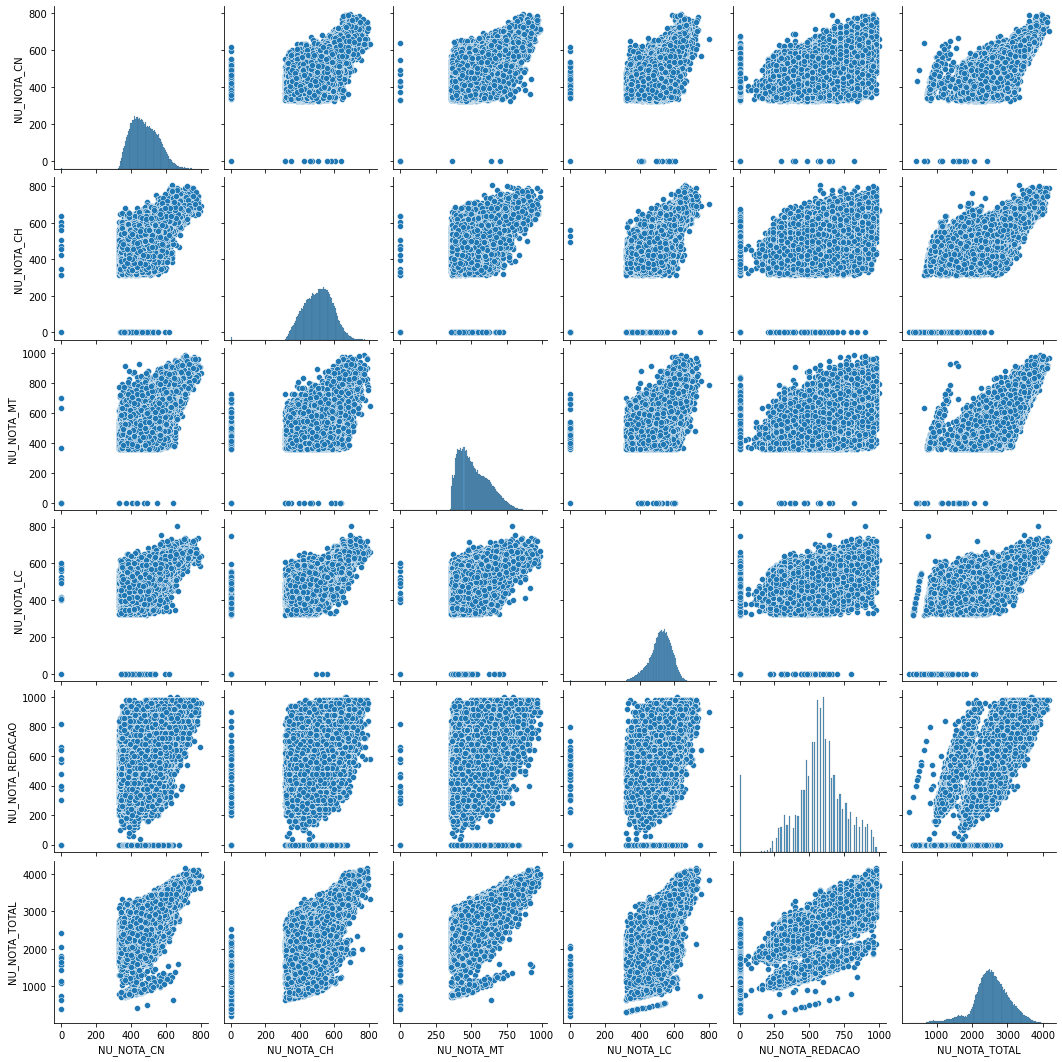

In [133]:
sns.pairplot(dados_sem_nota_zero[provas])

Além de analisar as correlações graficamente, podemos também utilizar métodos do Pandas para isso.

In [134]:
correlacao = dados_sem_nota_zero[provas].corr()
correlacao

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_TOTAL
NU_NOTA_CN,1.000000,0.668979,0.649527,0.641624,0.504740,0.785600
NU_NOTA_CH,0.668979,1.000000,0.610332,0.744170,0.528338,0.735534
NU_NOTA_MT,0.649527,0.610332,1.000000,0.587710,0.493046,0.790051
NU_NOTA_LC,0.641624,0.744170,0.587710,1.000000,0.535797,0.711686
NU_NOTA_REDACAO,0.504740,0.528338,0.493046,0.535797,1.000000,0.783647
NU_NOTA_TOTAL,0.785600,0.735534,0.790051,0.711686,0.783647,1.000000


Com essa tabela, conseguimos resumir a correlação entre as notas.

A correlação entre as notas é dada por um valor entre -1 e 1. Quando ela está próxima a 0, significa que as variáveis possuem relação fraca entre si. Quando o valor é próximo das extremidades, isso mostra que as gradezas tem um relacionamento forte entre si.

Além da matriz de correlação, podemos usar também um mapa de calor para entender o relacionamento entre as variáveis do dataset.

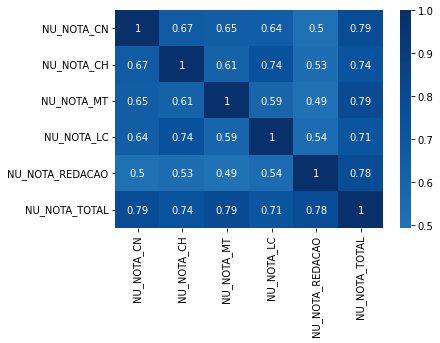

In [135]:
sns.heatmap(correlacao, cmap='Blues', center=0, annot=True)

## 2. Desafios


### Desafio 01: Plotar as médias, medianas e moda nas notas de LC e MT(matiplotlib linha vertical)

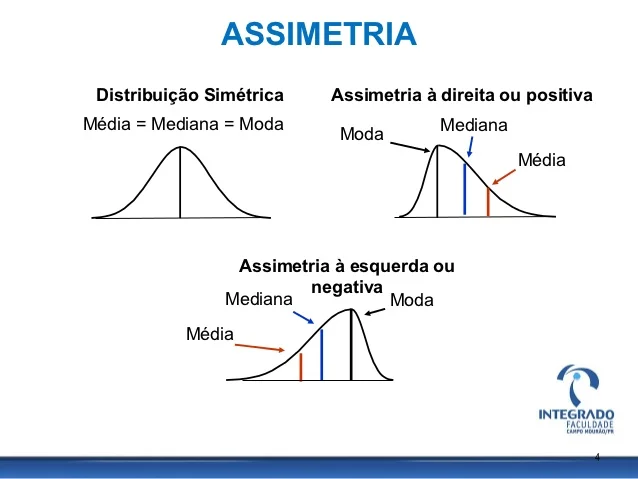

Durante a analise dos gráficos, as notas de matemática e de linguagens e códigos aparentaram ter uma distribuição similar: assimétrica à esquerda. Para saber se isso é correto, precisamos saber os valores das médias, medianas e modas de cada série.

In [136]:
media = dados_sem_nota_zero['NU_NOTA_MT'].mean()
moda = dados_sem_nota_zero['NU_NOTA_MT'].mode()
mediana = dados_sem_nota_zero['NU_NOTA_MT'].median()


print(f'Os valores para a nota de matemática são: média -> {media}, moda -> {moda[0]}, mediana -> {mediana}')

Os valores para a nota de matemática são: média -> 523.5834291074179, moda -> 427.1, mediana -> 501.6


In [137]:
media = dados_sem_nota_zero['NU_NOTA_LC'].mean()
moda = dados_sem_nota_zero['NU_NOTA_LC'].mode()
mediana = dados_sem_nota_zero['NU_NOTA_LC'].median()


print(f'Os valores para a nota de linguagens e códigos são: média ->{media}, moda -> {moda[0]}, mediana -> {mediana}')

Os valores para a nota de linguagens e códigos são: média ->520.6816687414523, moda -> 528.5, mediana -> 526.1


Analisando os números, vemos que as notas de matemática estão sim assimétricas a direitra, mas as notas de português não: elas estão assimétricas à esquerda. Para confirmarmos, podemos modificar os gráficos feitos e incluir linhas para mostrar os valores desejados.

Para adicionar as linhas, iremos utilizar a biblioteca matplotlib

Primeiro vamos analisar o gráfico das notas de matemática. Os valores que queremos verificar estarão nas cores:

Média - vermelho
Moda - preto
Mediana - verde

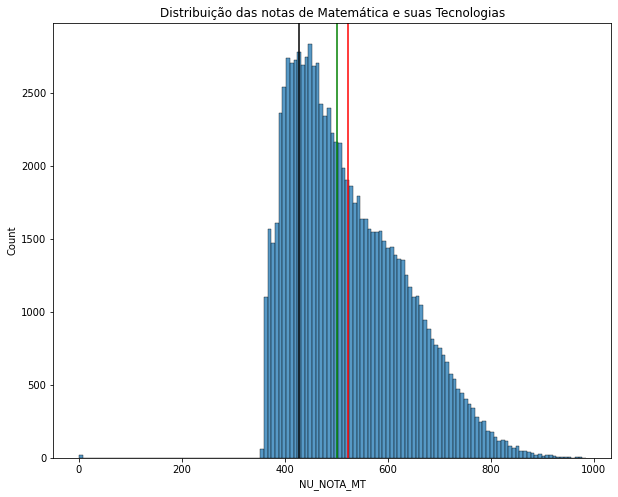

In [138]:
plt.figure(figsize = (10,8))

media = dados_sem_nota_zero['NU_NOTA_MT'].mean()
moda = dados_sem_nota_zero['NU_NOTA_MT'].mode()
mediana = dados_sem_nota_zero['NU_NOTA_MT'].median()


sns.histplot(dados_sem_nota_zero, x = 'NU_NOTA_MT')
plt.axvline(x = media, ymin=0, ymax=30000, label = 'Média', color = 'red')
plt.axvline(x = moda[0], label = 'Moda', color = 'black')
plt.axvline(x = mediana, label = 'Mediana', color = 'green')
plt.title('Distribuição das notas de Matemática e suas Tecnologias')

plt.show()

Verificando o gráfico, vemos que os valores estão seguindo o que se espera de uma distribuição assimétrica para a direita.

Devemos fazer o mesmo com o gráfico das notas em português, usando as mesmas cores para as linhas.

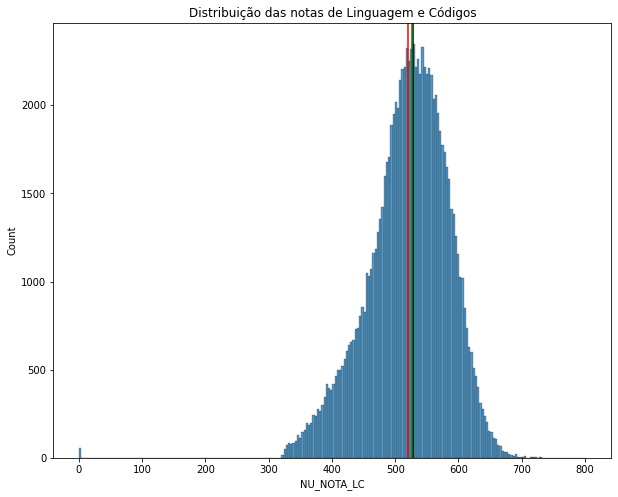

In [139]:
plt.figure(figsize = (10,8))

media = dados_sem_nota_zero['NU_NOTA_LC'].mean()
moda = dados_sem_nota_zero['NU_NOTA_LC'].mode()
mediana = dados_sem_nota_zero['NU_NOTA_LC'].median()


sns.histplot(dados_sem_nota_zero, x = 'NU_NOTA_LC')
plt.axvline(x = media, ymin=0, ymax=30000, label = 'Média', color = 'red')
plt.axvline(x = moda[0], label = 'Moda', color = 'black')
plt.axvline(x = mediana, label = 'Mediana', color = 'green')
plt.title('Distribuição das notas de Linguagem e Códigos')

plt.show()

Olhando o gráfico, vemos que os valores estão mais próximos entre si. Apesar dos valores seguirem o esperado de uma curva assimétrica a esquerda, os valores aparentam estar muito próximos entre si, o que caracterizaria uma curva normal.

### Desafio 02: Melhorar a visualização da matriz de correlação e analisar mais detalhadamente

Para melhorar a visualização do mapa de calor, iremos usar o código disponível [nesse link](https://seaborn.pydata.org/examples/many_pairwise_correlations.html).

In [140]:
import numpy as np

A matriz pode ser dividida em dois triangulos usando a diagonal principal da mesma. Para uma visualização mais limpa, podemos eliminar o triangulo superior da visualização, por meio de uma máscara.

In [141]:
mascara = np.triu(np.ones_like(correlacao, dtype=bool))

Essa máscara será usada quando o gráfico for chamado. Podemos também utilizar outra paleta de cores para que os valores possam ser melhor diferenciados.

In [142]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)

Por último, criamos o gráfico usando os parametros já definidos, além de alterar outros pontos:

- vmax, vmin = valor de referência para o mapa de calor
- square = altera os parametros para que todas as células sejam um quadrado.
- linewidths = expessura da linha que divide as células



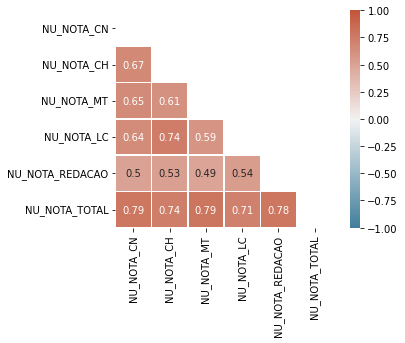

In [143]:
sns.heatmap(correlacao, mask=mascara, cmap=cmap, annot=True, center = 0, vmin = -1, vmax = 1,
            square=True, linewidths=.5,)

Para entendermos melhor o significado, mudarei as legendas e também incluirei um título ao gráfico.

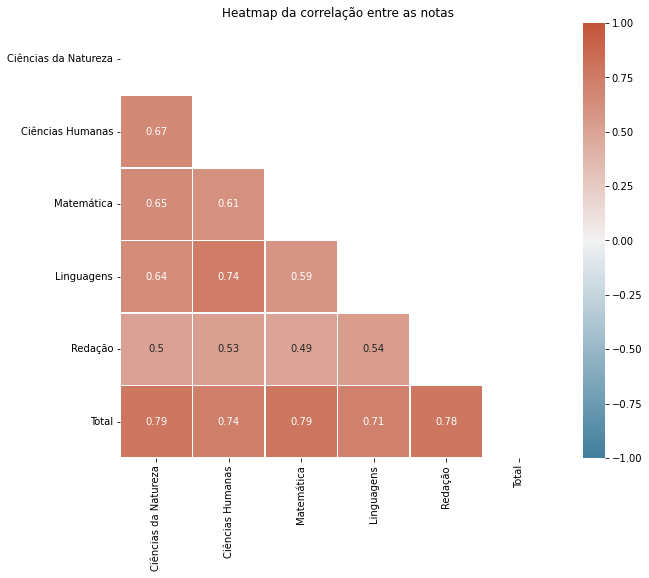

In [144]:
plt.figure(figsize=(10,8))

ticks=['Ciências da Natureza', 'Ciências Humanas', 'Matemática', 'Linguagens', 'Redação', 'Total']


sns.heatmap(correlacao, mask=mascara, cmap=cmap, annot=True, center = 0, vmin = -1, vmax = 1,
        square=True, linewidths=.5, xticklabels = ticks, yticklabels = ticks)

plt.title('Heatmap da correlação entre as notas')
plt.show()

### Desafio 03: Filtrar as notas por seu estado ou sua cidade e refazer as análises, verificando se são semelhantes ao geral

Primeiro, irei filtrar os alunos por estado. Depois verificarei a correlação via método pandas e pairplot, além de refazer os gráficos das notas de matemática e português.

In [145]:
dados_sc = dados_sem_nota_zero.query('SG_UF_RESIDENCIA == "SC"')
dados_sc.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
4611,190001184257,2019,4208203,Itajaí,42,SC,19,M,1,3,...,A,A,B,B,A,C,A,A,A,2403.7
17120,190001684315,2019,4216008,São Carlos,42,SC,17,M,1,1,...,A,A,B,A,A,B,A,B,B,2345.4
17121,190001684352,2019,4202404,Blumenau,42,SC,18,F,1,1,...,A,B,B,A,A,C,A,B,B,2881.2
17122,190001684416,2019,4216701,São José do Cedro,42,SC,21,M,1,1,...,A,B,B,A,A,C,A,B,B,3088.1
17123,190001684476,2019,4216602,São José,42,SC,30,M,1,2,...,A,A,C,A,A,C,A,B,B,2264.1


In [146]:
print(f'A base de dados contém informações de {dados_sc.shape[0]} estudantes e {dados_sc.shape[1]} colunas')

A base de dados contém informações de 2080 estudantes e 137 colunas


In [147]:
dados_sc[provas].corr()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_TOTAL
NU_NOTA_CN,1.000000,0.647744,0.639269,0.612759,0.471782,0.792466
NU_NOTA_CH,0.647744,1.000000,0.565167,0.731516,0.485597,0.694344
NU_NOTA_MT,0.639269,0.565167,1.000000,0.523520,0.477360,0.798377
NU_NOTA_LC,0.612759,0.731516,0.523520,1.000000,0.474853,0.658482
NU_NOTA_REDACAO,0.471782,0.485597,0.477360,0.474853,1.000000,0.759393
NU_NOTA_TOTAL,0.792466,0.694344,0.798377,0.658482,0.759393,1.000000


Apesar dos valores serem diferntes, a correlação parece seguir a mesma lógica entre as notas. Isso se dá ao fato do número de estudantes estar reduzido a 2080 alunos.

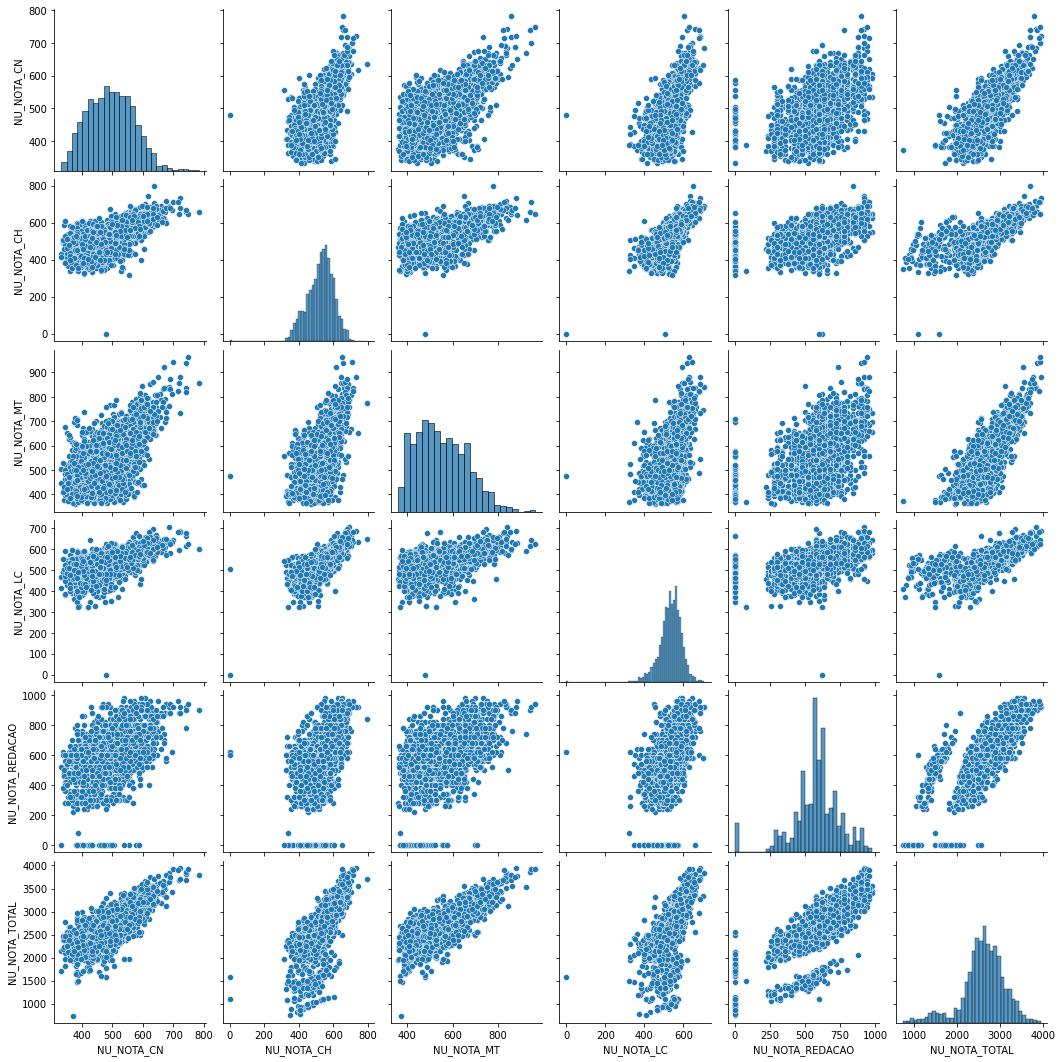

In [148]:
sns.pairplot(dados_sc[provas])

Novamente os gráficos são similares aos do grupo total. Os das notas também se assemelham, inclusive tendo a mesma característica quanto a assimetria da curva.

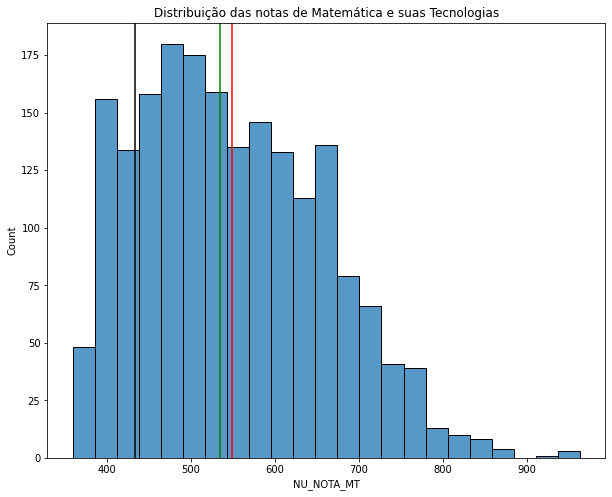

In [149]:
plt.figure(figsize = (10,8))

media = dados_sc['NU_NOTA_MT'].mean()
moda = dados_sc['NU_NOTA_MT'].mode()
mediana = dados_sc['NU_NOTA_MT'].median()


sns.histplot(dados_sc, x = 'NU_NOTA_MT')
plt.axvline(x = media, ymin=0, ymax=30000, label = 'Média', color = 'red')
plt.axvline(x = moda[0], label = 'Moda', color = 'black')
plt.axvline(x = mediana, label = 'Mediana', color = 'green')
plt.title('Distribuição das notas de Matemática e suas Tecnologias')

plt.show()

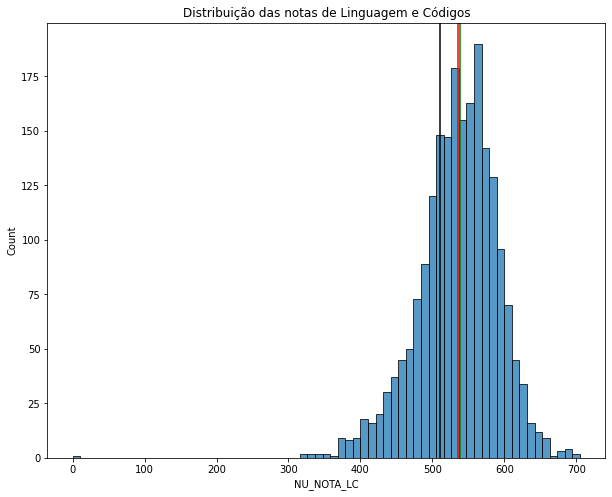

In [150]:
plt.figure(figsize = (10,8))

media = dados_sc['NU_NOTA_LC'].mean()
moda = dados_sc['NU_NOTA_LC'].mode()
mediana = dados_sc['NU_NOTA_LC'].median()


sns.histplot(dados_sc, x = 'NU_NOTA_LC')
plt.axvline(x = media, ymin=0, ymax=30000, label = 'Média', color = 'red')
plt.axvline(x = moda[0], label = 'Moda', color = 'black')
plt.axvline(x = mediana, label = 'Mediana', color = 'green')
plt.title('Distribuição das notas de Linguagem e Códigos')

plt.show()

### Desafio 04: Pensar sobre a correlação entre Matemática e Linguagens.

A correlação entre as notas das provas de matemática e linguagens pode ter algumas explicações. 

Para mim, há alguns pontos importantes a serem considerados:

- Há uma correlação forte entre as duas provas por conta da rotina de estudos dos alunos, principalmente de faixa de renda maiores.

- As provas são feitas em dias diferentes, permitindo um descanso entre as provas consideradas mais dificeis.

- Há uma correlação mais forte entre as notas de disciplinas que foram aplicadas no mesmo dia.

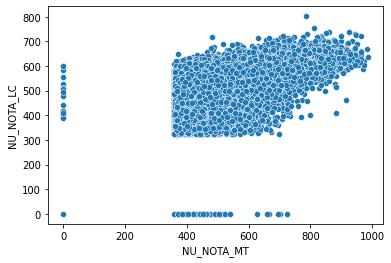

In [151]:
sns.scatterplot(data = dados_sem_nota_zero, x ='NU_NOTA_MT', y = 'NU_NOTA_LC')

Primeiramente, preciso pensar na situação sócio-econômica dos alunos participantes. Apesar do ENEM procurar ser um exame unificado para todo o Brasil, alguns estudantes conseguem se preparar melhor que outros. Esse preparo é percebido na relação das notas mais altas entre as disciplinas. Alunos que tem mais tempo pra estudar, conseguem focar em diversas matérias e conseguem um desempenho melhor no geral.

Além disso, as duas provas foram aplicadas em dias diferentes. A prova de Linguagens e Códigos foi aplicada no primeiro dia: 3 de novembro e a de Matemática e suas Tecnologias no segundo dia: 10 de novembro. Isso permitiu que os alunos conseguissem estudar mais focadamente nessas provas na semana que antecedia essas provas. Essa divisão foi dada por serem os dois eixos disciplinares mais difíceis no ENEM.

Apesar de aparentar terem uma correlação forte, a correlação entre essas notas não é a mais forte. A prova de Linguagens e Códigos tem uma correlação mais forte com a prova de Ciências Humanas, e a de Matemática com a prova de Ciências da Natureza. Essa correlação se apresenta pois as provas foram aplicadas no mesmo dia: no dia 3 de novembro foram aplicadas as provas de Linguagens e Códigos, Ciências Humanas e Redação. No segundo dia de provas foi aplicada a prova de Matemática e suas Tecnologias e Ciências da Natureza.

Por último, percebemos que as menores correlações estão ligadas a nota de Redação. Essa nota tem uma métrica diferente das outras provas. Nas provas, as questões são de múltipla escolha. Isso permite que o aluno possa acertar as questões mesmo sem saber qual a correta, seja por sorte ou por estratégia. Isso permite que os alunos consigam também notas maiores em um geral, com poucos alunos tirando nota 0 nas provas das disciplinas.

No caso da redação, o aluno não consegue ter um bom resultado sem conseguir focar na prova. Além disso, há alguns fatores que façam com que o aluno tire 0 na nota, incluindo fuga de tema ou não obedecer o formato correto. O tema da redação também tem seu papel nas notas: como o tema só é sabido no momento da prova, o preparo para ela acaba se diferenciando dos demais.

# Aula 04: Prevendo Notas com Machine Learning

## 1. Aula

Aproveitando das tabelas de correlação, iremos criar um modelo de machine learning para que seja possível prever as notas dos participantes.

Há diversos modelos de madchine learning que utilizam tipos diferentes de variáveis. 

Para os dados disponíveis, por ter a característica de serem números contínuos iremos usar um modelo de regressão linear.

Primeiro, vamos criar um modelo que irá prever a nota de matemática se baseando nas notas das outras provas.

In [152]:
provas_entrada = ['NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_CN', 'NU_NOTA_REDACAO']
provas_saida = 'NU_NOTA_MT'

Após separar as notas desejadas, vamos criar 2 dataframes com as notas desejadas

In [153]:
notas_entrada = dados_sem_nota_zero[provas_entrada]
notas_saida = dados_sem_nota_zero[provas_saida]

In [154]:
notas_entrada

,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_CN,NU_NOTA_REDACAO
0,512.3,488.6,435.6,420.0
1,409.3,375.3,NaN,400.0
2,499.1,441.0,423.2,560.0
3,578.1,551.5,426.2,500.0
4,571.3,511.2,516.5,780.0
...,...,...,...,...
127375,559.6,525.7,502.4,740.0
127376,380.9,450.3,449.1,520.0
127377,516.0,497.9,NaN,440.0
127378,416.2,517.3,564.7,620.0


Para facilitar o entendimento e manter um padrão, iremos usar o X para significar *notas_entrada* e Y para *notas_saida*.

In [155]:
x = notas_entrada
y = notas_saida

Para podermos validar o modelo, precisamos separar os dataframes em 2 partes: uma para treinar o modelo e a outra para fazermos testes com ele. Para isso, usaremos a biblioteca *scikit-learn*. A divisão será de 75% dos dados para o treinamento do modelo e 25% para os testes posteriores.

O parâmetro *random_state* serve para garantir que toda a vez que a divisão for feita, ela será feita da mesma forma. Esse parâmetro foi definido na variável SEED, que foi criada para ser usada também durante a criação dos modelos.

In [156]:
from sklearn.model_selection import train_test_split

SEED = 4321

x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size = 0.25, random_state=SEED)

Após a separação, podemos criar os modelos de regressão linear para resolver o problema das notas.

### Linear SVR

O primeiro modelo que iremos utilizar é o LinearSVR.

In [157]:
from sklearn.svm import LinearSVR

modelo = LinearSVR(random_state = SEED)

modelo.fit(x_treino, y_teste)

ValueError: ignored

Como nosso dataset possue notas NaN, ocorreu um erro na criação do modelo de LinearSVR. Esse modelo não aceita esses tipos de notas. Precisamos remover os NaN antes da criação do modelo.

In [158]:
dados_sem_nota_zero = dados_sem_nota_zero[provas].dropna()

notas_entrada = dados_sem_nota_zero[provas_entrada]
notas_saida = dados_sem_nota_zero[provas_saida]

In [159]:
x = notas_entrada
y = notas_saida

In [160]:
from sklearn.model_selection import train_test_split

SEED = 4321

x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size = 0.25,
                                                        random_state=SEED)

In [161]:
from sklearn.svm import LinearSVR

modelo = LinearSVR(random_state = SEED, max_iter=100000)

modelo.fit(x_treino, y_treino)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVR(max_iter=100000, random_state=4321)

Com o modelo pronto, podemos testar o mesmo e avaliar ele.

In [162]:
previsao_matematica = modelo.predict(x_teste)

Para verificar se o modelo está fazendo uma boa avaliação, podemos comparar com o valor verdadeiro por meio de um *scatterplot*.

Primeiro, vamos guardar a previsão do modelo em uma variável e depois iremos criar o gráfico.

(-50.0, 1050.0)

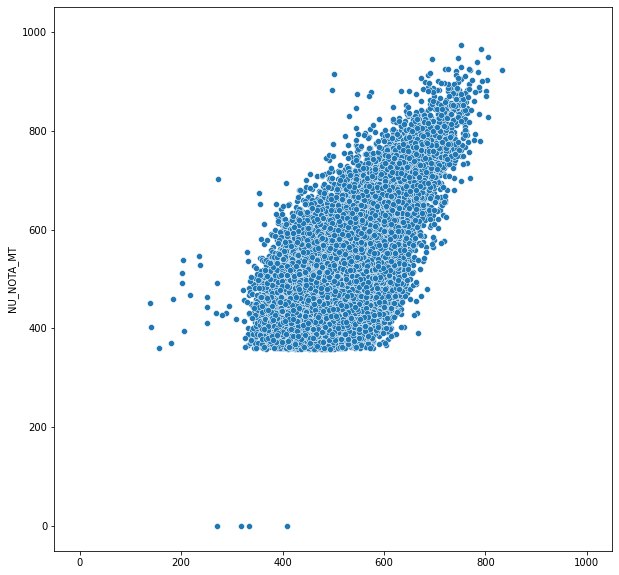

In [163]:
plt.figure(figsize=(10,10))

sns.scatterplot(x=previsao_matematica, y = y_teste)
plt.xlim(-50,1050)
plt.ylim(-50,1050)

(-50.0, 1050.0)

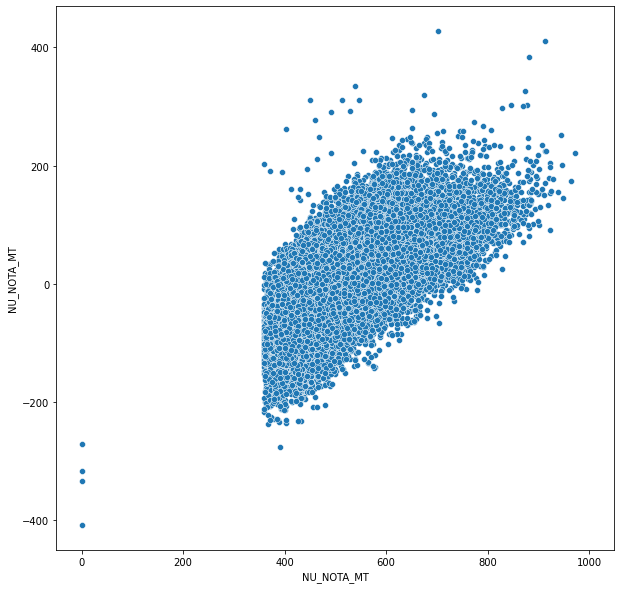

In [164]:
plt.figure(figsize=(10,10))

sns.scatterplot(x=y_teste, y = y_teste - previsao_matematica)
plt.xlim(-50,1050)

Analisando os gráficos, vimos que o nosso modelo possue um erro grande, que é tendencioso de acordo com a nota da pessoa. Quanto maior a nota de matemática da pessoa, maior também é o erro do sistema. 

Apesar de percebemos no gráfico, precisamos quantificar o erro para conseguir comparar com outros modelos que possamos criar no futuro.

Primeiro, podemos ver esse erro em um dataframe.

In [165]:
resultados = pd.DataFrame()
resultados['Real'] = y_teste
resultados['Previsão'] = previsao_matematica
resultados['Diferença'] = resultados['Real'] - resultados['Previsão']

resultados.head()

,Real,Previsão,Diferença
114991,459.7,533.103746,-73.403746
104685,617.2,609.068990,8.131010
91028,520.0,478.921889,41.078111
115802,703.8,567.115954,136.684046
93303,627.1,557.162670,69.937330


Assim conseguimos ver a diferença entre as notas. Para evitar ruídos, podemos criar uma nova coluna que irá receber o valor da diferença elevado ao quadrado.

In [166]:
resultados['Diferença ao Quadrado'] = (resultados['Real'] - resultados['Previsão'])**2

resultados.head()

,Real,Previsão,Diferença,Diferença ao Quadrado
114991,459.7,533.103746,-73.403746,5388.109885
104685,617.2,609.068990,8.131010,66.113325
91028,520.0,478.921889,41.078111,1687.411239
115802,703.8,567.115954,136.684046,18682.528462
93303,627.1,557.162670,69.937330,4891.230163


In [167]:
resultados['Diferença ao Quadrado'].mean()

6019.068358068246

In [168]:
resultados['Diferença ao Quadrado'].mean()**(1/2)

77.58265500785757

Com essas métricas, vemos que o nosso modelo, em média, está errando a nota em 77 pontos.

Apesar de sabermos esse valor, não temos como afirmar se o modelo é bom ou ruim. Para podermos comparar e também avaliar o erro do modelo, iremos importar um modelo *dummy*. Assim poderemos comparar os valores dos erros e saber classificar o modelo criado anteriormente.

In [169]:
from sklearn.dummy import DummyRegressor

modelo_dummy = DummyRegressor()
modelo_dummy.fit(x_treino,y_treino)
dummy_predicoes = modelo_dummy.predict(x_teste)

In [170]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_teste, dummy_predicoes)

12063.645588509502

Comparando com o modelo dummy, vemos que o erro do modelo original está melhor que o dummy.

## 2. Desafios

### Desafio 01: Procurar outro modelo de ML para treinar e comparar com os modelos criados em aula

Apesar do erro do modelo ser menor que o dummy, é possível melhorar o modelo projetado. Para definir um modelo melhor, iremos usar um tutorial da biblioteca que facilita a escolha dos modelos de machine learning, se baseando em alguns dados do projeto.

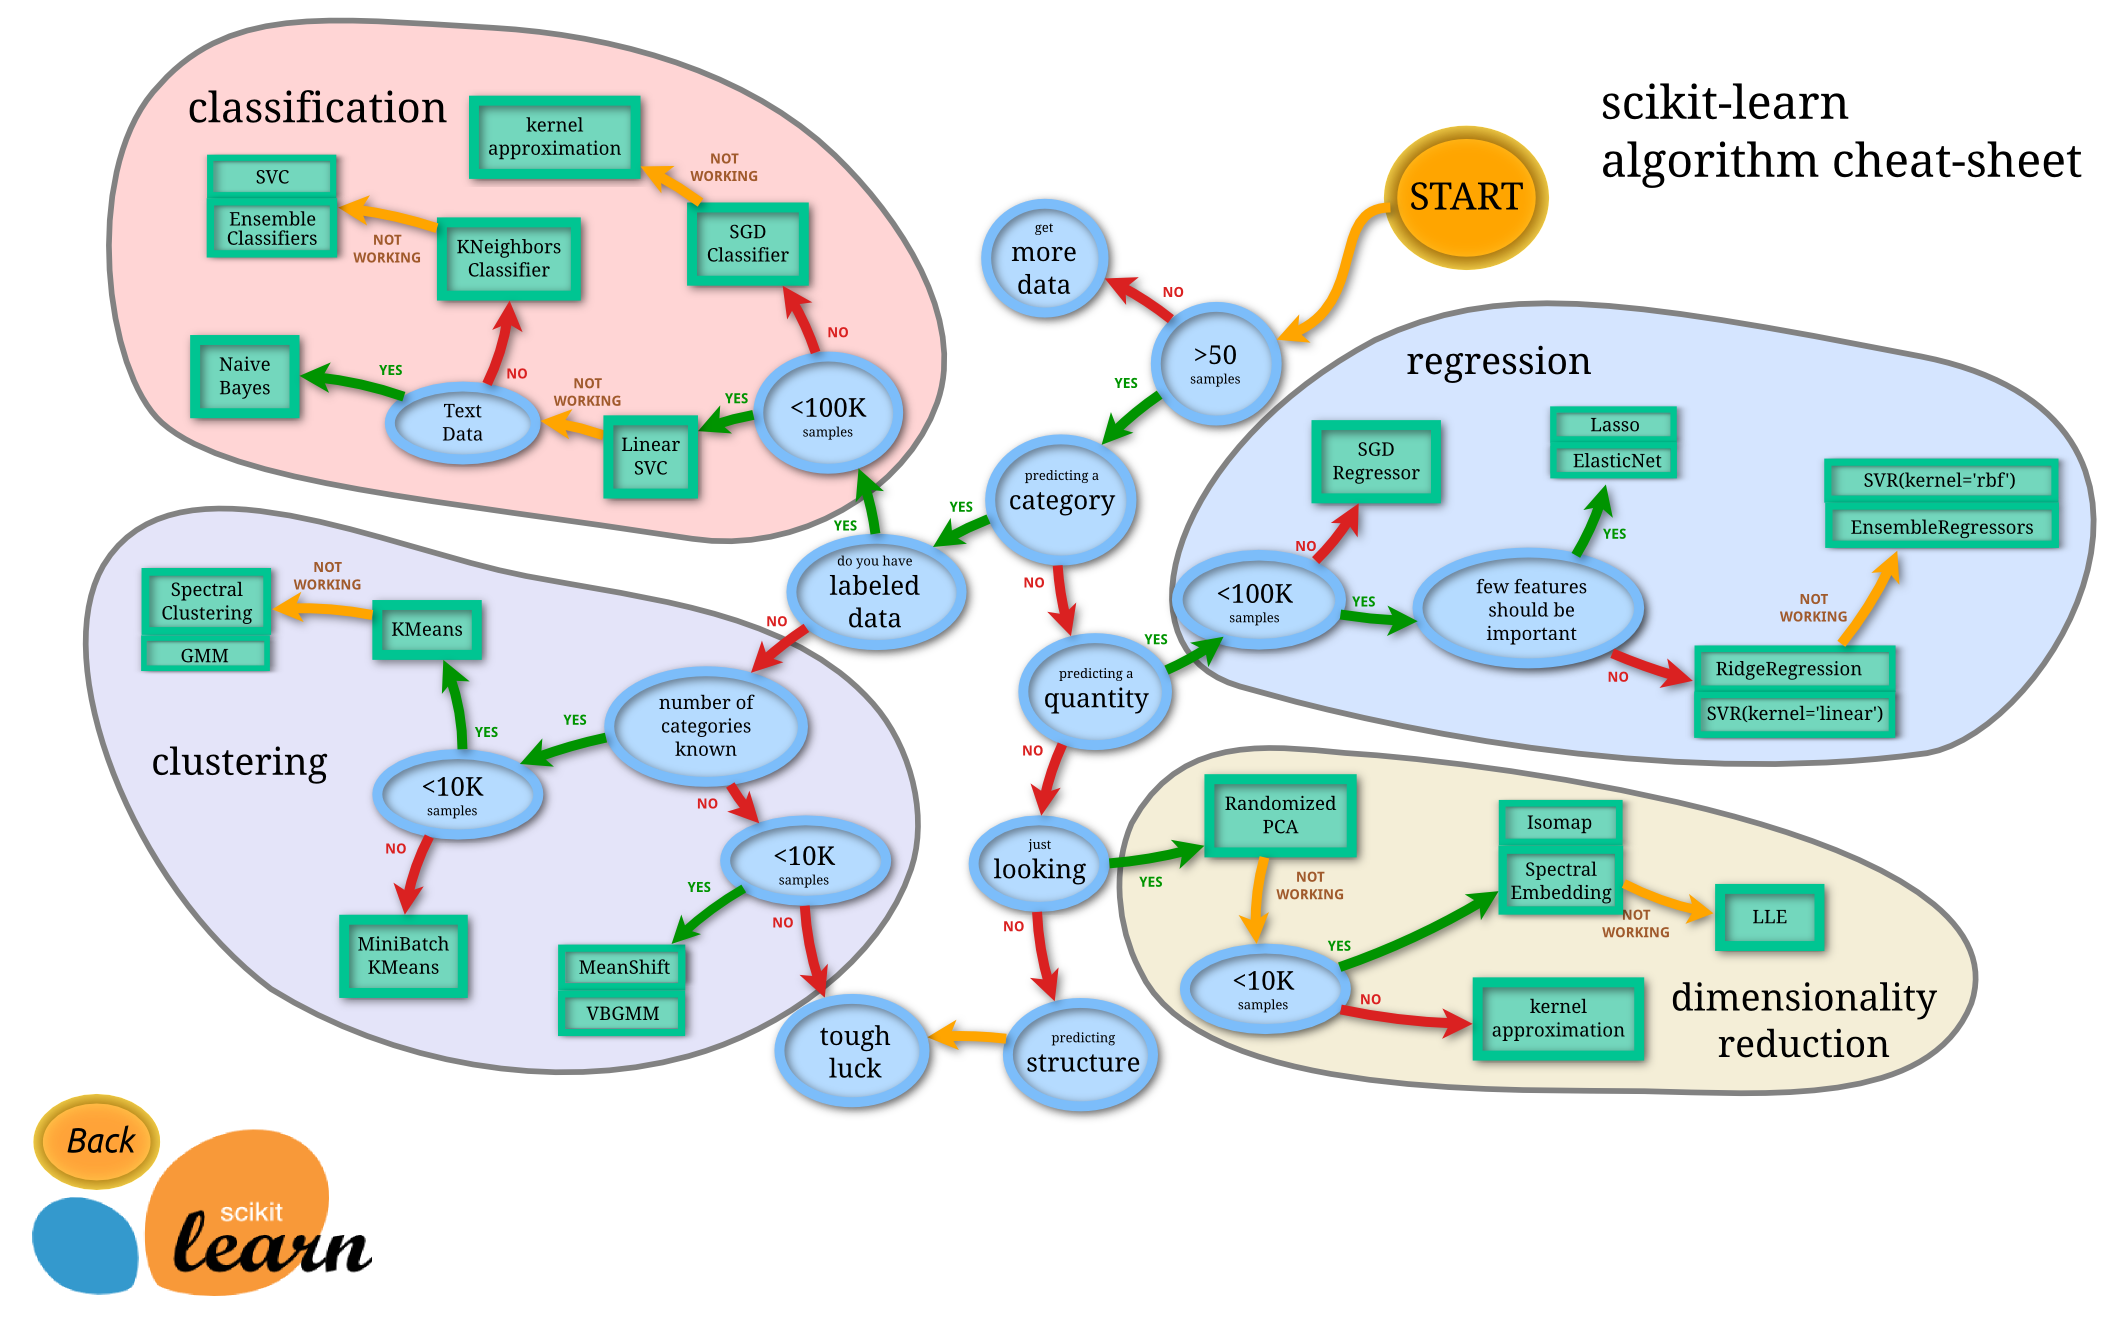

Utilizando esse tutorial, podemos procurar um modelo SVR ou de RidgeRegression. Primeiramente iremos usar o SVR.

In [171]:
from sklearn import svm


modelo_SVR = svm.SVR()
modelo_SVR.fit(x_treino,y_treino)


SVR()

Após a criação e treinamento do modelo, podemos fazer a previsão e comparar os erros.

In [172]:
previsao_SVR = modelo_SVR.predict(x_teste)

In [173]:
from sklearn.metrics import mean_squared_error

print(f'Erro do dummy: {mean_squared_error(y_teste, dummy_predicoes)}')
print(f'Erro do LinearSVR: {mean_squared_error(y_teste, previsao_matematica)}')
print(f'Erro do SVR: {mean_squared_error(y_teste, previsao_SVR)}')

Erro do dummy: 12063.645588509502
Erro do LinearSVR: 6019.068358068295
Erro do SVR: 5476.684645818325


O erro desse modelo é menor que o erro do modelo visto em aula. Para fazermos mais testes, irei também tentar o modelo RidgeRegression para esse dataset.

In [174]:
from sklearn import linear_model

modelo_Ridge = linear_model.Ridge(alpha=.5)
modelo_Ridge.fit(x_treino,y_treino)

Ridge(alpha=0.5)

In [175]:
previsao_Ridge = modelo_Ridge.predict(x_teste)

In [176]:
from sklearn.metrics import mean_squared_error

print(f'Erro do dummy: {mean_squared_error(y_teste, dummy_predicoes)}')
print(f'Erro do LinearSVR: {mean_squared_error(y_teste, previsao_matematica)}')
print(f'Erro do SVR: {mean_squared_error(y_teste, previsao_SVR)}')
print(f'Erro do RidgeRegression: {mean_squared_error(y_teste, previsao_Ridge)}')

Erro do dummy: 12063.645588509502
Erro do LinearSVR: 6019.068358068295
Erro do SVR: 5476.684645818325
Erro do RidgeRegression: 5961.372212382398


O modelo RidgeRegression se mostrou mais eficaz que o LinearSVR, mas no mesmo nível que o SVR.

### Desafio 02: Ler a documentação do Dummy e alterar o método de regressão

O modelo DummyRegressor utiliza a média para prever o resultado final. É possível alterar isso mudando o parâmetro *strategy*. Com isso, podemos fazer a previsão usando também a mediana, uma constante ou algum quartil.

Irei criar 2 novos modelos de DummyRegression, alterando a estratégia e daí irei comparar os erros com o criado em aula.

O primeiro será utilizando a mediana, o segundo utilizando o quartil de 60%.

In [177]:
from sklearn.dummy import DummyRegressor

modelo_dummy_mediana = DummyRegressor(strategy = 'median')
modelo_dummy_mediana.fit(x_treino,y_treino)
dummy_mediana_previsao = modelo_dummy_mediana.predict(x_teste)

In [178]:
from sklearn.dummy import DummyRegressor

modelo_dummy_60 = DummyRegressor(strategy = 'quantile', quantile=0.6)
modelo_dummy_60.fit(x_treino,y_treino)
dummy_mediana_60 = modelo_dummy_60.predict(x_teste)

Agora é possível comparar os erros:

In [179]:
from sklearn.metrics import mean_squared_error

print(f'Erro do Dummy utilizando a média: {mean_squared_error(y_teste, dummy_predicoes)}')
print(f'Erro do Dummy utilizando o quartil 60%: {mean_squared_error(y_teste, dummy_mediana_60)}')
print(f'Erro do Dummy utilizando a mediana: {mean_squared_error(y_teste, dummy_mediana_previsao)}')

Erro do Dummy utilizando a média: 12063.645588509502
Erro do Dummy utilizando o quartil 60%: 12175.037907067215
Erro do Dummy utilizando a mediana: 12599.969971795981


Percebe-se que o erro do dummy ao utilizar a média é o menor dos 3. Os valores tem pequena alteração, no entanto.

### Desafio 03: Buscar outra métrica para avaliar modelos de regressão

Além da métrica da diferença ao quadrado, podemos usar outros métodos da biblioteca para saber o desempenho dos modelos de regressão linear.

[Nesse link](https://scikit-learn.org/stable/modules/model_evaluation.html#the-scoring-parameter-defining-model-evaluation-rules) podemos ver algumas possibilidades e dicas de quando usar cada cálculo. 

Para testar, usarei o *r2_score()*. Essa métrica tem como valor máximo 1, permitindo uma comparação mais padronizada entre os modelos.

Esse método será usado para avaliar os modelos de regressão LinearSVR e DummyRegression vistos na aula e também os modelos SVR e RidgeRegression definidos no primeiro desafio da aula 4.

In [180]:
from sklearn.metrics import r2_score

print(f'R² dummy: {r2_score(y_teste, dummy_predicoes)}')
print(f'R² LinearSVR: {r2_score(y_teste, previsao_matematica)}')
print(f'R² SVR: {r2_score(y_teste, previsao_SVR)}')
print(f'R² RidgeRegression: {r2_score(y_teste, previsao_Ridge)}')

R² dummy: -0.00016532890019238522
R² LinearSVR: 0.5009747725219841
R² SVR: 0.5459423886519953
R² RidgeRegression: 0.5057582091790733


Com esses valores de R², infiro que:

- O modelo dummy é útil para comparação dos modelos, mas não permite uma boa análise profunda.
- Os modelos foram melhores que o Dummy, mas ainda sim tiveram um desempenho ruim na previsão das notas.
- O modelo SVR foi o que teve melhor desempenho dentre os modelos de regressão linear desenvolvidos na aula. 

Apesar de serem melhores que o dummy, os modelos ainda não são muito precisos. É possível melhorar o restultado deles entendendo melhor o problema ou aumentando o número de variáveis do modelo, como incluir as respostas das perguntas sócio-econômicas.

# Aula 05: Validação de modelo e Overfit

Esta aula tem como objetivo expandir o estudo de Machine Learning e aprofundar-se no modelo LinearSVR.

## 1. Aula

Primeiramente vamos estanciar novamente o modelo e descobrir as predicoes.

In [181]:
from sklearn.svm import LinearSVR

modelo = LinearSVR(random_state = SEED, max_iter=100000)

modelo.fit(x_treino, y_treino)

predicoes_matematica = modelo.predict(x_teste)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Além disso, vamos calcular o erro e plotar em um gráfico.

In [182]:
mean_squared_error(y_teste, predicoes_matematica)

6019.068358068295

Esse modelo, apesar de ter um resultado bom, depende muito do parâmetro *random_state*. Esses modelos mudam muito o resultado, por conta de uma aleatoriedade nele. O ideal é achar modelos que não dependem muito dessa aleatoriedade.

Um bom modelo para isso é o modelo de Árvore de Decisão.

In [183]:
from sklearn.tree import DecisionTreeRegressor

modelo_arvore = DecisionTreeRegressor(max_depth = 3)

modelo_arvore.fit(x_treino, y_treino)

predicoes_arvore = modelo_arvore.predict(x_teste)

mean_squared_error(y_teste, predicoes_arvore)

6027.166905272975

O valor do erro também depende da aleatoriedade no momento de divisão entre os datasets de treino e de teste. Para corrigir isso, iremos dividir o dataset em pedaços menor, sem utilizar uma aleatoriedade para isso.

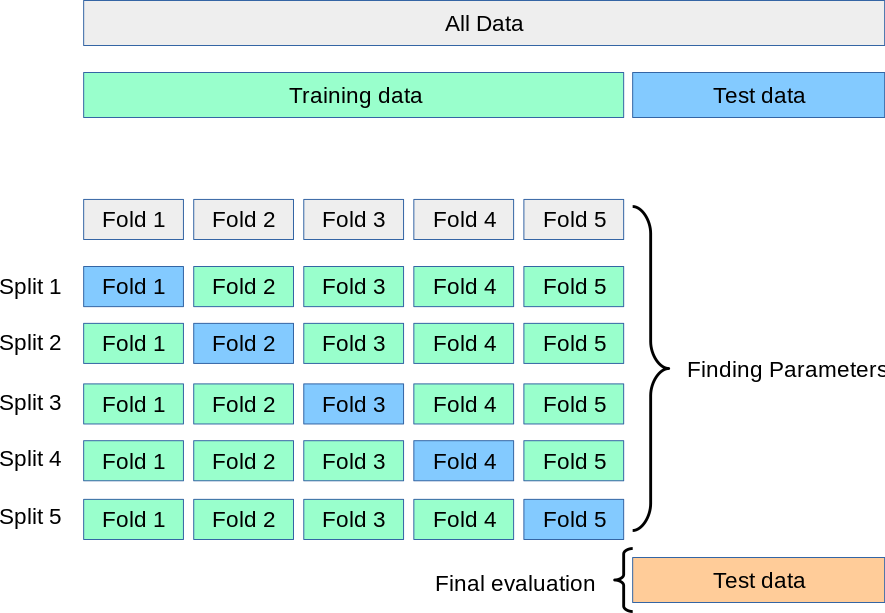

In [184]:
from sklearn.model_selection import cross_validate


modelo_arvore = DecisionTreeRegressor(max_depth = 2)
cross_validate(modelo_arvore, x, y, scoring = 'neg_mean_squared_error')

{'fit_time': array([0.05756807, 0.05439878, 0.05345535, 0.05428505, 0.05462146]),
 'score_time': array([0.00293016, 0.00264311, 0.00276399, 0.00343394, 0.00264311]),
 'test_score': array([-6317.91361711, -6390.69330384, -6519.97057993, -6702.12730215,
        -6851.82019408])}

Para podermos comparar entre os dois modelos, devemos fazer a média dos valores de *test_score*.

In [185]:
resultados = cross_validate(modelo_arvore, x, y, cv = 10,scoring = 'neg_mean_squared_error')

In [186]:
media = (resultados['test_score']*(-1)).mean()
media

6558.227664658771

Além da média, podemos calcular o desvio padrão do nosso modelo, e também do intervalo de confiança do mesmo.

In [187]:
media = (resultados['test_score']*(-1)).mean()
desvio_padrão = (resultados['test_score']*(-1)).std()

limite_inferior = media - (2*(desvio_padrão))
limite_superior = media + (2*(desvio_padrão))

print(f'O intervalo de confiança vai de {limite_inferior} até {limite_superior}')

O intervalo de confiança vai de 6015.722549536806 até 7100.732779780736


Isso significa que 95% das previsões estão errando entre 6015 e 7100.

In [188]:
def calcula_mse(resultados):

    media = (resultados['test_score']*(-1)).mean()
    desvio_padrão = (resultados['test_score']*(-1)).std()

    limite_inferior = media - (2*(desvio_padrão))
    limite_superior = media + (2*(desvio_padrão))

    print(f'O intervalo de confiança vai de {limite_inferior} até {limite_superior}')

In [189]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
import numpy as np

SEED = 1232
np.random.seed(SEED)

partes = KFold(n_splits=10, shuffle = True)

modelo_arvore = DecisionTreeRegressor(max_depth = 2)
resultados = cross_validate(modelo_arvore, x, y, cv=partes, scoring = 'neg_mean_squared_error')
calcula_mse(resultados)

O intervalo de confiança vai de 6353.889489672839 até 6759.883085642473


O parâmetro *max_depth* é o único que foi usado. Podemos, no entanto, acrescentar outros parâmetros para melhorar o modelo criado.

In [190]:
 def regressor_arvore(nivel):

    SEED = 1232
    np.random.seed(SEED)

    partes = KFold(n_splits=10, shuffle = True)

    modelo_arvore = DecisionTreeRegressor(max_depth = nivel)
    resultados = cross_validate(modelo_arvore, x, y, cv=partes, scoring = 'neg_mean_squared_error', return_train_score=True)
    print(f'Treino = {(resultados["train_score"]*(-1)).mean()} | Teste = {(resultados["test_score"]*(-1)).mean()}')


In [191]:
regressor_arvore(6)

Treino = 5469.677369145869 | Teste = 5593.304363812442


In [192]:
for i in range(1,21):
    regressor_arvore(i)



Treino = 7844.952652412207 | Teste = 7857.871770206351
Treino = 6527.783475408351 | Teste = 6556.886287657656
Treino = 6021.275229419075 | Teste = 6054.767567442072
Treino = 5760.834451245899 | Teste = 5815.707286597402
Treino = 5598.158955426787 | Teste = 5675.196789060744
Treino = 5469.677369145869 | Teste = 5593.304363812442
Treino = 5369.458309852721 | Teste = 5541.646599457925
Treino = 5276.16965707928 | Teste = 5542.053091078966
Treino = 5166.713159932668 | Teste = 5608.390265709719
Treino = 5022.598049115693 | Teste = 5761.4934268457555
Treino = 4833.560706021637 | Teste = 5955.958714168911
Treino = 4598.125022484774 | Teste = 6216.553608637031
Treino = 4316.3791662866815 | Teste = 6514.07032957674
Treino = 4000.6209880837496 | Teste = 6848.344737600635
Treino = 3655.8197526274853 | Teste = 7235.435245488157
Treino = 3295.832684540846 | Teste = 7633.948584409428
Treino = 2931.7212612043872 | Teste = 8059.378759944782
Treino = 2575.59534021339 | Teste = 8435.937377688437
Treino =

Ao se fazer a função e comparar os valores, percebe-se que o modelo está melhorando o seu score para os valores de treino, porém piorando os resultados em valores de teste. Essa é uma característica indejesada, já que o sistema não está conseguindo prever bem os valores, mesmo quando treinado muito. Esse comportamento é típico de *overfitting*.

Ao perceber o overtifitting, também encontramos o número de níveis que a nossa árvore de decisão trabalha melhor: 7 níveis. A pairtir desse momento, o modelo começa a ter resultados piores.

In [193]:
 def regressor_arvore(nivel):

    SEED = 1232
    np.random.seed(SEED)

    partes = KFold(n_splits=10, shuffle = True)

    modelo_arvore = DecisionTreeRegressor(max_depth = nivel)
    resultados = cross_validate(modelo_arvore, x, y, cv=partes, scoring = 'neg_mean_squared_error', return_train_score=True)
    print(f'Treino = {(resultados["train_score"]*(-1)).mean()} | Teste = {(resultados["test_score"]*(-1)).mean()}')


## 2. Desafios

### Desafio 01: Pesquisar sobre o intervalo de confiança

O intervalo de confiança é um intervalo calculado a partir das observações dos dados e que varia de amostra para amostra.

O intervalo de confiança é uma porcentagem e mostra a frequência que o parâmetro observado contém o valor ndo mundo real. 

Esse intervalo normalmente é dado como 95%, ou seja, em 95% das vezes em que se observar o parâmetro na vida real, esse valor estará dentro do intervalo calculado.

O valor do coeficiente pode ser alterado de acordo com o seu estudo, tamanho de amostra e variabilidade. Outros valores incluem 90% e 99%. 

### Desafio 02: Testar com outros parâmetros da árvore de decisão

Além do parâmetro *max_depth*, podemos alterar outros parâmetros no modelo de árvore de decisão que irão melhorar o desempenho do modelo. Dentre eles podemos incluir *max_leaf_nodes*, *max_features* e *min_samples_leaf*, entre outros.

Para mudar os parâmentros e fazer os testes, irei utilizar a função. No local de *max_depth*, usarei o número 7, que foi o que apresentou menor erro. Irei gerar cenários primeiramente para o parâmetro *max_leaf_nodes* e encontrar o melhor modelo. Depois, irei alterar o parâmetro *min_samples_split*, para encontrar um modelo melhor.

#### Alterando a função para *max_leaf_nodes*

In [194]:
 def regressor_max_leaf_nodes(folhas):

    SEED = 1232
    np.random.seed(SEED)

    partes = KFold(n_splits=10, shuffle = True)

    modelo_arvore = DecisionTreeRegressor(max_depth = 7, max_leaf_nodes=folhas)
    resultados = cross_validate(modelo_arvore, x, y, cv=partes, scoring = 'neg_mean_squared_error', return_train_score=True)
    print(f'Treino = {(resultados["train_score"]*(-1)).mean()} | Teste = {(resultados["test_score"]*(-1)).mean()}')


Agora, vamos analisar se, ao aumentar o valor assossiado ao parâmetro, o erro diminui.

In [195]:
for i in range(115,140):
    print(f'i = {i}')
    regressor_max_leaf_nodes(i)

i = 115
Treino = 5373.40858763748 | Teste = 5543.474008969654
i = 116
Treino = 5372.760724436685 | Teste = 5543.1054161846205
i = 117
Treino = 5372.180459118986 | Teste = 5542.7918094956485
i = 118
Treino = 5371.650733804646 | Teste = 5542.50211462083
i = 119
Treino = 5371.163108979579 | Teste = 5543.015009515664
i = 120
Treino = 5370.724105379084 | Teste = 5543.548333360765
i = 121
Treino = 5370.344425590379 | Teste = 5543.16523045664
i = 122
Treino = 5370.056530655605 | Teste = 5542.856296885151
i = 123
Treino = 5369.820196777555 | Teste = 5542.736219333745
i = 124
Treino = 5369.626684252407 | Teste = 5542.726726097921
i = 125
Treino = 5369.539630219444 | Teste = 5542.868139376765
i = 126
Treino = 5369.4770359005415 | Teste = 5542.758601674749
i = 127
Treino = 5369.458309852721 | Teste = 5542.395864964733
i = 128
Treino = 5369.458309852721 | Teste = 5542.395864964733
i = 129
Treino = 5369.458309852721 | Teste = 5542.395864964733
i = 130
Treino = 5369.458309852721 | Teste = 5542.39586

Percebese que, ao chegar em **max_leaf_nodes = 127**, o erro se estabiliza e não diminui a medida que o valor aumenta. Descobrir esse limite inferior para esse parâmetro permite poupar tempo de computação.

No entanto, o erro foi maior que o apresentado sem a definição do parâmetro. Tentarei diminuir o erro alterando mais um parâmetro.

#### Alterando a função para *min_samples_split*

Alterando a função anterior para *max_leaf_nodes = 127*, podemos aumentar o número de divisões por ponto, com o intuito de diminuir o erro. 

In [196]:
 def regressor_min_samples_split(divisoes):

    SEED = 1232
    np.random.seed(SEED)

    partes = KFold(n_splits=10, shuffle = True)

    modelo_arvore = DecisionTreeRegressor(max_depth = 7, max_leaf_nodes=127, min_samples_split=divisoes)
    resultados = cross_validate(modelo_arvore, x, y, cv=partes, scoring = 'neg_mean_squared_error', return_train_score=True)
    print(f'Treino = {(resultados["train_score"]*(-1)).mean()} | Teste = {(resultados["test_score"]*(-1)).mean()}')

In [197]:
for i in range(115,130):
    print(f'i = {i}')
    regressor_min_samples_split(i)

i = 115
Treino = 5372.255391345849 | Teste = 5539.82078170658
i = 116
Treino = 5372.255391345849 | Teste = 5539.82078170658
i = 117
Treino = 5372.283198989857 | Teste = 5539.765324737306
i = 118
Treino = 5372.4510417875335 | Teste = 5539.642281282258
i = 119
Treino = 5372.484904956451 | Teste = 5539.798504788304
i = 120
Treino = 5372.519703784936 | Teste = 5539.9786871184415
i = 121
Treino = 5372.519703784936 | Teste = 5539.9786871184415
i = 122
Treino = 5372.519703784936 | Teste = 5539.9786871184415
i = 123
Treino = 5372.519703784936 | Teste = 5539.9786871184415
i = 124
Treino = 5372.519703784936 | Teste = 5539.9786871184415
i = 125
Treino = 5372.519703784936 | Teste = 5539.9786871184415
i = 126
Treino = 5372.519703784936 | Teste = 5539.9786871184415
i = 127
Treino = 5372.519703784936 | Teste = 5539.9786871184415
i = 128
Treino = 5372.519703784936 | Teste = 5539.9786871184415
i = 129
Treino = 5372.519703784936 | Teste = 5539.9786871184415


Alterando o parâmetro, consegui achar também um valor ideal de **min_samples_split = 118**. Como última tentativa de melhorar o sistema, irei encontrar o valor ideal do parâmetro *min_samples_leaf*.

#### Alterando a função para *min_samples_leaf*

In [198]:
 def regressor_min_samples_leaf(folhas):

    SEED = 1232
    np.random.seed(SEED)

    partes = KFold(n_splits=10, shuffle = True)

    modelo_arvore = DecisionTreeRegressor(max_depth = 7, max_leaf_nodes=127, min_samples_split=118, min_samples_leaf=folhas)
    resultados = cross_validate(modelo_arvore, x, y, cv=partes, scoring = 'neg_mean_squared_error', return_train_score=True)
    print(f'Treino = {(resultados["train_score"]*(-1)).mean()} | Teste = {(resultados["test_score"]*(-1)).mean()}')

In [199]:
for i in range(170,190):
    print(f'i = {i}')
    regressor_min_samples_leaf(i)

i = 170
Treino = 5401.701596925848 | Teste = 5535.211101510324
i = 171
Treino = 5401.8681704643395 | Teste = 5535.396850166437
i = 172
Treino = 5401.979195083917 | Teste = 5535.078250884579
i = 173
Treino = 5402.028947301424 | Teste = 5534.869684763837
i = 174
Treino = 5402.160106427673 | Teste = 5534.924815275727
i = 175
Treino = 5402.181000169746 | Teste = 5534.912269076524
i = 176
Treino = 5402.349906729286 | Teste = 5535.019617099389
i = 177
Treino = 5402.493741007591 | Teste = 5534.979139039695
i = 178
Treino = 5402.725247266941 | Teste = 5535.442747963319
i = 179
Treino = 5402.794332689906 | Teste = 5535.398700950007
i = 180
Treino = 5402.908504110694 | Teste = 5535.502784689948
i = 181
Treino = 5403.024237539029 | Teste = 5536.079712404863
i = 182
Treino = 5403.085173144322 | Teste = 5535.987982230852
i = 183
Treino = 5403.222653579391 | Teste = 5536.172266897043
i = 184
Treino = 5403.452612710576 | Teste = 5535.844140718384
i = 185
Treino = 5403.5506857309865 | Teste = 5535.982

Com os testes feitos, o valor ideal para o parâmetro é de **173**. O erro porém, não diminuiu substancialmente ao se alterar os valores. Isso pode significar que o modelo escolhido pode não ser o ideal e que testar outro sistema pode ser interessante.

#### Utilizando os parâmetros para mais níveis

Apesar de testar com 7 níveis os parâmetros, pode ser que o número de níveis não seja o ideal com esses parâmetros. Irei novamente calcular os erros mudando a quantidade de níveis do modelo para ver se há um resultado melhor.

In [200]:
 def regressor_testa_niveis(nivel):

    SEED = 1232
    np.random.seed(SEED)

    partes = KFold(n_splits=10, shuffle = True)

    modelo_arvore = DecisionTreeRegressor(max_depth = nivel, max_leaf_nodes=127, min_samples_split=118, min_samples_leaf=173)
    resultados = cross_validate(modelo_arvore, x, y, cv=partes, scoring = 'neg_mean_squared_error', return_train_score=True)
    print(f'Treino = {(resultados["train_score"]*(-1)).mean()} | Teste = {(resultados["test_score"]*(-1)).mean()}')

In [201]:
for i in range(1,20):
    print(f'i = {i}')
    regressor_testa_niveis(i)

i = 1
Treino = 7844.952652412207 | Teste = 7857.871770206351
i = 2
Treino = 6527.783475408351 | Teste = 6556.886287657656
i = 3
Treino = 6021.275229419075 | Teste = 6054.767567442072
i = 4
Treino = 5760.834451245899 | Teste = 5815.707286597402
i = 5
Treino = 5599.207964530886 | Teste = 5672.9159161276775
i = 6
Treino = 5482.456491359488 | Teste = 5586.358174467043
i = 7
Treino = 5402.028947301424 | Teste = 5534.869684763837
i = 8
Treino = 5377.458007419731 | Teste = 5527.472812788821
i = 9
Treino = 5376.357334596947 | Teste = 5529.125973073018
i = 10
Treino = 5376.357334596947 | Teste = 5529.125973073018
i = 11
Treino = 5376.357334596947 | Teste = 5529.125973073018
i = 12
Treino = 5376.357334596947 | Teste = 5529.125973073018
i = 13
Treino = 5376.357334596947 | Teste = 5529.125973073018
i = 14
Treino = 5376.357334596947 | Teste = 5529.125973073018
i = 15
Treino = 5376.357334596947 | Teste = 5529.125973073018
i = 16
Treino = 5376.357334596947 | Teste = 5529.125973073018
i = 17
Treino = 

Podemos melhorar o sistema para o parâmetro **max_depth = 9**. É possível melhorar também esse sistema, porém irei complementar isso em outro momento.

### Desafio 03: Procurar outras formas de realizar os ajustes de parâmetros com o Sklearn

Além de ajustar os parametros manualmente, a própria biblioteca *scikit-learn* possue métodos para ajuste automático de parâmetros. Um desses métodos é o [*GridSearchCV*](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). Usarei ela para encontrar os mesmos parâmetros definidos anterior: *max_depth*, *max_leaf_nodes*, *min_samples_leaf* e *min_samples_split*. O modelo usado será o DecisionTree feito em aula.

Com o modelo instanciado, podemos fazer as modificações para utilizar o método. Primeiramente vamos definir os parâmetros desejados e os intervalos que eles podem receber.

In [202]:
'''from sklearn.model_selection import GridSearchCV
SEED = 1232
np.random.seed(SEED)

parametros = {'max_leaf_nodes' : [i for i in range (1,51)], 
              'min_samples_leaf' : [i for i in range (1,51)],
              'min_samples_split' : [i for i in range (1,51)],
              'max_depth' : [i for i in range (1,11)]}

modelo_arvore = DecisionTreeRegressor()

teste = GridSearchCV(modelo_arvore,parametros)
teste.fit(x_treino, y_treino)

GridSearchCV(estimator = DecisionTreeRegressor(), param_grid = parametros)'''

"from sklearn.model_selection import GridSearchCV\nSEED = 1232\nnp.random.seed(SEED)\n\nparametros = {'max_leaf_nodes' : [i for i in range (1,51)], \n              'min_samples_leaf' : [i for i in range (1,51)],\n              'min_samples_split' : [i for i in range (1,51)],\n              'max_depth' : [i for i in range (1,11)]}\n\nmodelo_arvore = DecisionTreeRegressor()\n\nteste = GridSearchCV(modelo_arvore,parametros)\nteste.fit(x_treino, y_treino)\n\nGridSearchCV(estimator = DecisionTreeRegressor(), param_grid = parametros)"

### Desafio 04: Pesquisar o que é o problema de underfit

Além do problema de *overfitting*, que se caracteriza pelo erro baixo nos valores de treino, porém com erro alto em valores de teste, outro problema comum em sistemas de machine learning é o de *underfitting*.

Esse problema não é muito discutido por ser um problema que todos os sistemas podem sofrer e de fácil percepção. Um modelo que sofre de *underfitting* não consegue generalizar modelar corretamente os dados de treino, não conseguindo fazer previsões precisas para os dados de teste.

Modelos que possuem esse comportamento são rapidamente descartados, pois as principais métricas de performance conseguem expor o problema. Para modelos *underfitted*, o ideal é alterar o algoritmo de machine learning para encontrar modelos mais adequados para o problema em questão.

### Desafio 05: Plotar um gráfico com test_score e train_test

Para a criação do gráfico, irei utilizar a mesma função criada durante a aula. Esse gráfico ira plotar os valores de *test_score* e *train_test* para os 20 primeiros níveis em 2 linhas no mesmo gráfico. Fazer isso nos permite perceber graficamente o problema do *overfitting*, encontrando-o assim mais facilmente. 

Primeiramente, irei modificar a função para que ela retorne os valores de treino e teste, permitindo assim guardar os valores em variáveis.

In [203]:
 def regressor_arvore(nivel):

    SEED = 1232
    np.random.seed(SEED)

    partes = KFold(n_splits=10, shuffle = True)

    modelo_arvore = DecisionTreeRegressor(max_depth = nivel)
    resultados = cross_validate(modelo_arvore, x, y, cv=partes, scoring = 'neg_mean_squared_error', return_train_score=True)
    treino = ((resultados["train_score"]*(-1)).mean())
    teste = ((resultados["test_score"]*(-1)).mean())

    return treino, teste

Após isso, criarei um loop para receber os valores dentro das variáveis. Essas variaveis virarão colunas dentro de um DataFrame pandas e depois irei criar o gráfico com base nesse dataframe

In [204]:
nivel = []
treino = []
teste = []


for i in range (1,21):
    train_test, test_score = regressor_arvore(i)
    nivel.append(i)
    treino.append(train_test)
    teste.append(test_score)

In [205]:
treino

[7844.952652412207,
 6527.783475408351,
 6021.275229419075,
 5760.834451245899,
 5598.158955426787,
 5469.677369145869,
 5369.458309852721,
 5276.16965707928,
 5166.713159932668,
 5022.598049115693,
 4833.560706021637,
 4598.125022484774,
 4316.3791662866815,
 4000.6209880837496,
 3655.8197526274853,
 3295.832684540846,
 2931.7212612043872,
 2575.59534021339,
 2233.5742434614776,
 1913.9193213994483]

Criarei um DataFrame para criar o gráfico utilizando duas linhas e comparar os valores de erro dos testes e do treino.

In [206]:
data_nivel = pd.DataFrame()
data_nivel['nivel'] = nivel
data_nivel['train_test'] = treino
data_nivel['test_score'] = teste

In [207]:
data_nivel.head()

,nivel,train_test,test_score
0,1,7844.952652,7857.871770
1,2,6527.783475,6556.886288
2,3,6021.275229,6054.767567
3,4,5760.834451,5815.707287
4,5,5598.158955,5675.196789


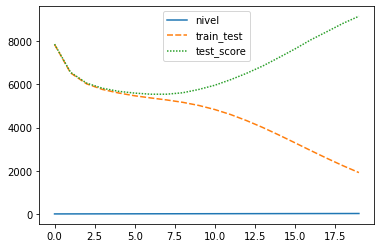

In [208]:
sns.lineplot(data = data_nivel)

Para melhorar a visualização, irei modificar o dataframe para que os níveis sejam o index, além de formatar a imagem

In [209]:
data_nivel.set_index('nivel', inplace = True)

Text(0.5, 1.0, 'Erro do modelo ao se aumentar o max_depth da árvore')

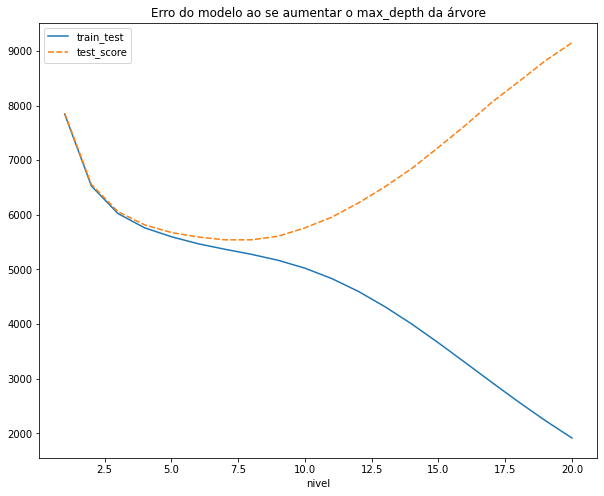

In [210]:
plt.figure(figsize=(10,8))

sns.lineplot(data = data_nivel)
plt.title("Erro do modelo ao se aumentar o max_depth da árvore")

No gráfico, conseguimos verificar o momento que houve o overfitting. Inicialmente os valores de erros são parecidos para os dados de treino e teste, porém, ao se aumentar o nível máximo da árvore, o erro referente aos dados de treino começa a diminuir mais rapidamente, enquanto o erro dos dados de teste voltam a crescer. No momento que esse erro começa a crescer é onde o problema do overffiting é percebido.